In [2]:
library(edgeR)
library(ggplot2)
library(ggrepel)
library(EnsDb.Hsapiens.v75)
library(stringr)
library(ComplexHeatmap)
library(circlize)
library(ggrepel)
library(stringr)
library(patchwork)
#library(org.Hs.eg.db)
library(viridis)
library(readxl)

In [13]:
count_data = read.table("../data/k562_brq_sgbcr_raw_counts.tsv", skip = 1, header = TRUE, row.names=1)
count_data = count_data[,6:dim(count_data)[2]]
head(count_data)

results.star.K562_sgNTC.1_NA_NA_rep1_Aligned.sortedByCoord.out.bam
ENSG00000223972.5   0                                                               
ENSG00000227232.5 117                                                               
ENSG00000278267.1  20                                                               
ENSG00000243485.5   0                                                               
ENSG00000284332.1   0                                                               
ENSG00000237613.2   0                                                               
                  results.star.K562_sgNTC.1_NA_NA_rep2_Aligned.sortedByCoord.out.bam
ENSG00000223972.5 66                                                                
ENSG00000227232.5 56                                                                
ENSG00000278267.1 32                                                                
ENSG00000243485.5  0                                                                
ENSG00000284332.1  0                                                                
ENSG00000237613.2  0                                                                
                  results.star.K562_sgNTC.1_NA_NA_rep3_Aligned.sortedByCoord.out.bam
ENSG00000223972.5   0                                                               
ENSG00000227232.5 124                                                               
ENSG00000278267.1   0                                                               
ENSG00000243485.5   0                                                               
ENSG00000284332.1   0                                                               
ENSG00000237613.2   0                                                               
                  results.star.K562_sgMYB.1_NA_NA_rep1_Aligned.sortedByCoord.out.bam
ENSG00000223972.5  1                                                                
ENSG00000227232.5 73                                                                
ENSG00000278267.1 54                                                                
ENSG00000243485.5  0                                                                
ENSG00000284332.1  0                                                                
ENSG00000237613.2  0                                                                
                  results.star.K562_sgMYB.1_NA_NA_rep2_Aligned.sortedByCoord.out.bam
ENSG00000223972.5   0                                                               
ENSG00000227232.5 120                                                               
ENSG00000278267.1   0                                                               
ENSG00000243485.5   0                                                               
ENSG00000284332.1   0                                                               
ENSG00000237613.2  84                                                               
                  results.star.K562_sgMYB.1_NA_NA_rep3_Aligned.sortedByCoord.out.bam
ENSG00000223972.5   6                                                               
ENSG00000227232.5 304                                                               
ENSG00000278267.1  39                                                               
ENSG00000243485.5   0                                                               
ENSG00000284332.1   0                                                               
ENSG00000237613.2   9                                                               
                  results.star.K562_sgBCR.1_NA_NA_rep1_Aligned.sortedByCoord.out.bam
ENSG00000223972.5   0                                                               
ENSG00000227232.5 350                                                               
ENSG00000278267.1  24                                                               
ENSG00000243485.5   0                                                               
ENSG00000284332.1   0  

In [14]:
# change colnames and rownames
colnames(count_data) = gsub("results.star.K562_", "", gsub("_Aligned.sortedByCoord.out.bam", "", colnames(count_data)))

potential_rownames = as.character(sapply(rownames(count_data), function(x) strsplit(x, '[.]')[[1]][1]))
count_data = count_data[!(duplicated(potential_rownames)),]
rownames(count_data) = potential_rownames[!(duplicated(potential_rownames))]                           
annotations_orgDb <- AnnotationDbi::select(EnsDb.Hsapiens.v75, # database
                                     keys = rownames(count_data) ,  # data to use for retrieval
                                     columns = c("SYMBOL"), # information to retreive for given data
                                     keytype = "GENEID") # type of data given in 'keys' argument
annotations_orgDb = annotations_orgDb[!duplicated(annotations_orgDb$SYMBOL),]

count_data = count_data[annotations_orgDb$GENEID,]  # you lose a few genes here but not many
rownames(count_data) = annotations_orgDb$SYMBOL
     
head(count_data)

sgNTC.1_NA_NA_rep1 sgNTC.1_NA_NA_rep2 sgNTC.1_NA_NA_rep3
DDX11L1      0                66                   0               
WASH7P     117                56                 124               
MIR1302-10   0                 0                   0               
FAM138A      0                 0                   0               
OR4G4P       0                 0                   0               
OR4G11P      0                 0                   0               
           sgMYB.1_NA_NA_rep1 sgMYB.1_NA_NA_rep2 sgMYB.1_NA_NA_rep3
DDX11L1     1                   0                  6               
WASH7P     73                 120                304               
MIR1302-10  0                   0                  0               
FAM138A     0                  84                  9               
OR4G4P      0                   0                  0               
OR4G11P     0                   0                  0               
           sgBCR.1_NA_NA_rep1 sgBCR.1_NA_NA_rep2 sgBCR.1_NA_NA_rep3
DDX11L1      0                 37                 36               
WASH7P     350                255                245               
MIR1302-10   0                  0                  0               
FAM138A      0                  0                  0               
OR4G4P       0                  0                  0               
OR4G11P      0                  0                  0               
           sgNTC.1_DMSO_72_rep1 ⋯ par_Veh_24_rep3 par_HU125_12_rep1
DDX11L1     15                  ⋯   0               0              
WASH7P     114                  ⋯ 381             540              
MIR1302-10  11                  ⋯   0               0              
FAM138A      0                  ⋯   0               0              
OR4G4P       0                  ⋯   0               0              
OR4G11P      0                  ⋯   0               0              
           par_HU125_12_rep2 par_HU125_12_rep3 par_HU1_12_rep1 par_HU1_12_rep2
DDX11L1     10                 0                 0               0            
WASH7P     399               407               553             410            
MIR1302-10   0                 0                 0               0            
FAM138A     11                 0                 0              14            
OR4G4P       0                 0                 0               0            
OR4G11P      0                 0                 0               0            
           par_HU1_12_rep3 par_HU125_24_rep1 par_HU125_24_rep2
DDX11L1      0               0                 0              
WASH7P     185             153               318              
MIR1302-10   0               0                 0              
FAM138A      0               0                 0              
OR4G4P       0               0                 0              
OR4G11P      0               0                 0              
           par_HU125_24_rep3
DDX11L1      0              
WASH7P     199              
MIR1302-10   0              
FAM138A      0              
OR4G4P       0              
OR4G11P      0

In [15]:
apply(count_data, 2, sum)

sgNTC.1_NA_NA_rep1       sgNTC.1_NA_NA_rep2       sgNTC.1_NA_NA_rep3 
                21721920                 16064714                 20303325 
      sgMYB.1_NA_NA_rep1       sgMYB.1_NA_NA_rep2       sgMYB.1_NA_NA_rep3 
                16651894                 21574849                 26216652 
      sgBCR.1_NA_NA_rep1       sgBCR.1_NA_NA_rep2       sgBCR.1_NA_NA_rep3 
                19441985                 20124581                 16072295 
    sgNTC.1_DMSO_72_rep1     sgNTC.1_DMSO_72_rep2     sgNTC.1_DMSO_72_rep3 
                20212193                 33466527                 29205338 
sgNTC.1_BRQ250nM_72_rep1 sgNTC.1_BRQ250nM_72_rep2 sgNTC.1_BRQ250nM_72_rep3 
                20194993                 14715198                 22599862 
         par_Veh_24_rep1          par_Veh_24_rep2          par_Veh_24_rep3 
                30295039                 24007012                 27821628 
       par_HU125_12_rep1        par_HU125_12_rep2        par_HU125_12_rep3 
                18133768                 25215613                 18689418 
         par_HU1_12_rep1          par_HU1_12_rep2          par_HU1_12_rep3 
                20910421                 22907894                 19977266 
       par_HU125_24_rep1        par_HU125_24_rep2        par_HU125_24_rep3 
                19472878                 18138916                 23017005

In [16]:
samples = read.csv("../data/bd333-300_sample_sheet.csv")
samples

name                          cell_line perturbation drug     time replicate
1  K562_sgNTC-1_NA_NA_rep1       K562      sgNTC-1      NA       NA   1        
2  K562_sgNTC-1_NA_NA_rep2       K562      sgNTC-1      NA       NA   2        
3  K562_sgNTC-1_NA_NA_rep3       K562      sgNTC-1      NA       NA   3        
4  K562_sgMYB-1_NA_NA_rep1       K562      sgMYB-1      NA       NA   1        
5  K562_sgMYB-1_NA_NA_rep2       K562      sgMYB-1      NA       NA   2        
6  K562_sgMYB-1_NA_NA_rep3       K562      sgMYB-1      NA       NA   3        
7  K562_sgBCR-1_NA_NA_rep1       K562      sgBCR-1      NA       NA   1        
8  K562_sgBCR-1_NA_NA_rep2       K562      sgBCR-1      NA       NA   2        
9  K562_sgBCR-1_NA_NA_rep3       K562      sgBCR-1      NA       NA   3        
10 K562_sgNTC-1_DMSO_72_rep1     K562      sgNTC-1      DMSO     72   1        
11 K562_sgNTC-1_DMSO_72_rep2     K562      sgNTC-1      DMSO     72   2        
12 K562_sgNTC-1_DMSO_72_rep3     K562      sgNTC-1      DMSO     72   3        
13 K562_sgNTC-1_BRQ250nM_72_rep1 K562      sgNTC-1      BRQ250nM 72   1        
14 K562_sgNTC-1_BRQ250nM_72_rep2 K562      sgNTC-1      BRQ250nM 72   2        
15 K562_sgNTC-1_BRQ250nM_72_rep3 K562      sgNTC-1      BRQ250nM 72   3        
16 K562_par_Veh_24_rep1          K562      par          Veh      24   1        
17 K562_par_Veh_24_rep2          K562      par          Veh      24   2        
18 K562_par_Veh_24_rep3          K562      par          Veh      24   3        
19 K562_par_HU125_12_rep1        K562      par          HU125    12   1        
20 K562_par_HU125_12_rep2        K562      par          HU125    12   2        
21 K562_par_HU125_12_rep3        K562      par          HU125    12   3        
22 K562_par_HU1_12_rep1          K562      par          HU1      12   1        
23 K562_par_HU1_12_rep2          K562      par          HU1      12   2        
24 K562_par_HU1_12_rep3          K562      par          HU1      12   3        
25 K562_par_HU125_24_rep1        K562      par          HU125    24   1        
26 K562_par_HU125_24_rep2        K562      par          HU125    24   2        
27 K562_par_HU125_24_rep3        K562      par          HU125    24   3        
   filename1                               
1  220427Van_D22-173070_1_sequence.fastq.gz
2  220427Van_D22-173078_1_sequence.fastq.gz
3  220427Van_D22-173086_1_sequence.fastq.gz
4  220427Van_D22-173094_1_sequence.fastq.gz
5  220427Van_D22-173007_1_sequence.fastq.gz
6  220427Van_D22-173015_1_sequence.fastq.gz
7  220427Van_D22-173023_1_sequence.fastq.gz
8  220427Van_D22-173031_1_sequence.fastq.gz
9  220427Van_D22-173039_1_sequence.fastq.gz
10 220427Van_D22-173047_1_sequence.fastq.gz
11 220427Van_D22-173055_1_sequence.fastq.gz
12 220427Van_D22-173063_1_sequence.fastq.gz
13 220427Van_D22-173071_1_sequence.fastq.gz
14 220427Van_D22-173079_1_sequence.fastq.gz
15 220427Van_D22-173087_1_sequence.fastq.gz
16 220427Van_D22-173095_1_sequence.fastq.gz
17 220427Van_D22-173008_1_sequence.fastq.gz
18 220427Van_D22-173016_1_sequence.fastq.gz
19 220427Van_D22-173024_1_sequence.fastq.gz
20 220427Van_D22-173032_1_sequence.fastq.gz
21 220427Van_D22-173040_1_sequence.fastq.gz
22 220427Van_D22-173048_1_sequence.fastq.gz
23 220427Van_D22-173056_1_sequence.fastq.gz
24 220427Van_D22-173064_1_sequence.fastq.gz
25 220427Van_D22-173072_1_sequence.fastq.gz
26 220427Van_D22-173080_1_sequence.fastq.gz
27 220427Van_D22-173088_1_sequence.fastq.gz
   filename2                               
1  220427Van_D22-173070_2_sequence.fastq.gz
2  220427Van_D22-173078_2_sequence.fastq.gz
3  220427Van_D22-173086_2_sequence.fastq.gz
4  220427Van_D22-173094_2_sequence.fastq.gz
5  220427Van_D22-173007_2_sequence.fastq.gz
6  220427Van_D22-173015_2_sequence.fastq.gz
7  220427Van_D22-173023_2_sequence.fastq.gz
8  220427Van_D22-173031_2_sequence.fastq.gz
9  220427Van_D22-173039_2_sequence.fastq.gz
10 220427Van_D22-173047_2_sequence.fastq.gz
11 220427Van_D22-173055_2_sequence.fastq.gz
12 

In [17]:
samples$perturbation = sapply(samples$perturbation, function(x) str_replace(x, '-', ''))
samples$cond = paste(samples$perturbation, samples$drug, samples$time, sep='_')
head(samples)

name                    cell_line perturbation drug time replicate
1 K562_sgNTC-1_NA_NA_rep1 K562      sgNTC1       NA   NA   1        
2 K562_sgNTC-1_NA_NA_rep2 K562      sgNTC1       NA   NA   2        
3 K562_sgNTC-1_NA_NA_rep3 K562      sgNTC1       NA   NA   3        
4 K562_sgMYB-1_NA_NA_rep1 K562      sgMYB1       NA   NA   1        
5 K562_sgMYB-1_NA_NA_rep2 K562      sgMYB1       NA   NA   2        
6 K562_sgMYB-1_NA_NA_rep3 K562      sgMYB1       NA   NA   3        
  filename1                               
1 220427Van_D22-173070_1_sequence.fastq.gz
2 220427Van_D22-173078_1_sequence.fastq.gz
3 220427Van_D22-173086_1_sequence.fastq.gz
4 220427Van_D22-173094_1_sequence.fastq.gz
5 220427Van_D22-173007_1_sequence.fastq.gz
6 220427Van_D22-173015_1_sequence.fastq.gz
  filename2                                cond        
1 220427Van_D22-173070_2_sequence.fastq.gz sgNTC1_NA_NA
2 220427Van_D22-173078_2_sequence.fastq.gz sgNTC1_NA_NA
3 220427Van_D22-173086_2_sequence.fastq.gz sgNTC1_NA_NA
4 220427Van_D22-173094_2_sequence.fastq.gz sgMYB1_NA_NA
5 220427Van_D22-173007_2_sequence.fastq.gz sgMYB1_NA_NA
6 220427Van_D22-173015_2_sequence.fastq.gz sgMYB1_NA_NA

In [18]:
conds = samples$cond

In [19]:
d0 <- DGEList(count_data)
d0 <- calcNormFactors(d0)
cutoff <- 10
drop <- which(apply(cpm(d0), 1, max) < cutoff)
d <- d0[-drop,] 
dim(d) # number of genes left

[1] 10834    27

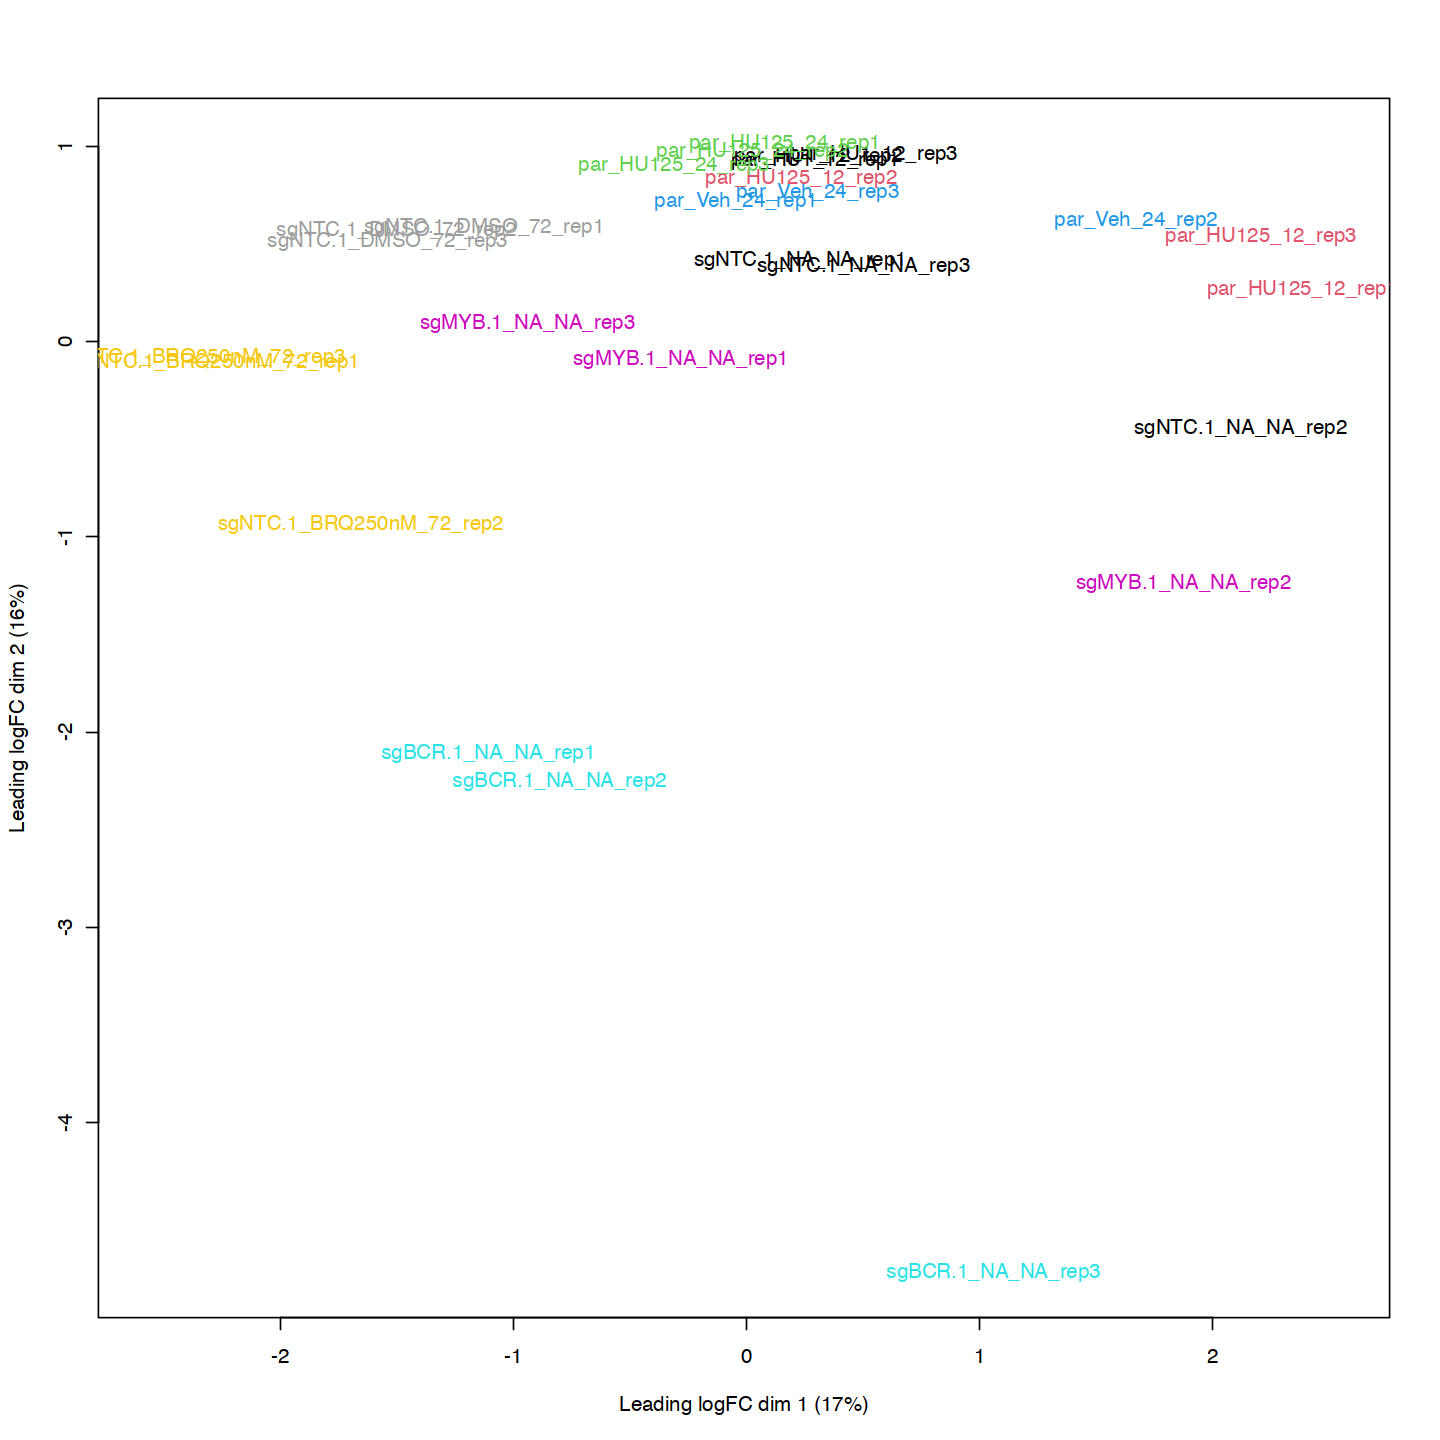

In [20]:
options(repr.plot.width=12, repr.plot.height=12)
plotMDS(d, col = as.numeric(as.factor(conds)))

condspar_HU1_12 condspar_HU125_12 condspar_HU125_24
WASH7P        4.0407739       4.372550          3.314057         
RP11-34P13.7  0.5493905       1.138462          2.097533         
AP006222.2    4.1668289       3.503708          4.424959         
RP4-669L17.10 1.8074221       1.957953          1.258262         
MTND1P23      2.2077717       2.101812          1.386453         
MTND2P28      5.1854115       5.119200          4.797531         
              condspar_Veh_24 condssgBCR1_NA_NA condssgMYB1_NA_NA
WASH7P         3.3507508      3.990173          2.926592         
RP11-34P13.7   0.4323609      2.320076          0.662143         
AP006222.2     3.5804506      6.067485          5.620668         
RP4-669L17.10 -0.5130605      1.085129          1.617200         
MTND1P23       1.4877279      3.201938          3.488086         
MTND2P28       5.0944855      6.196776          6.692836         
              condssgNTC1_BRQ250nM_72 condssgNTC1_DMSO_72 condssgNTC1_NA_NA
WASH7P        4.118626                3.530533            2.4298065        
RP11-34P13.7  2.145746                1.427201            1.8640188        
AP006222.2    5.575832                3.938709            4.7683647        
RP4-669L17.10 2.127025                2.280412            0.8411155        
MTND1P23      2.468117                2.582980            3.7884037        
MTND2P28      5.100004                6.259898            6.8758319

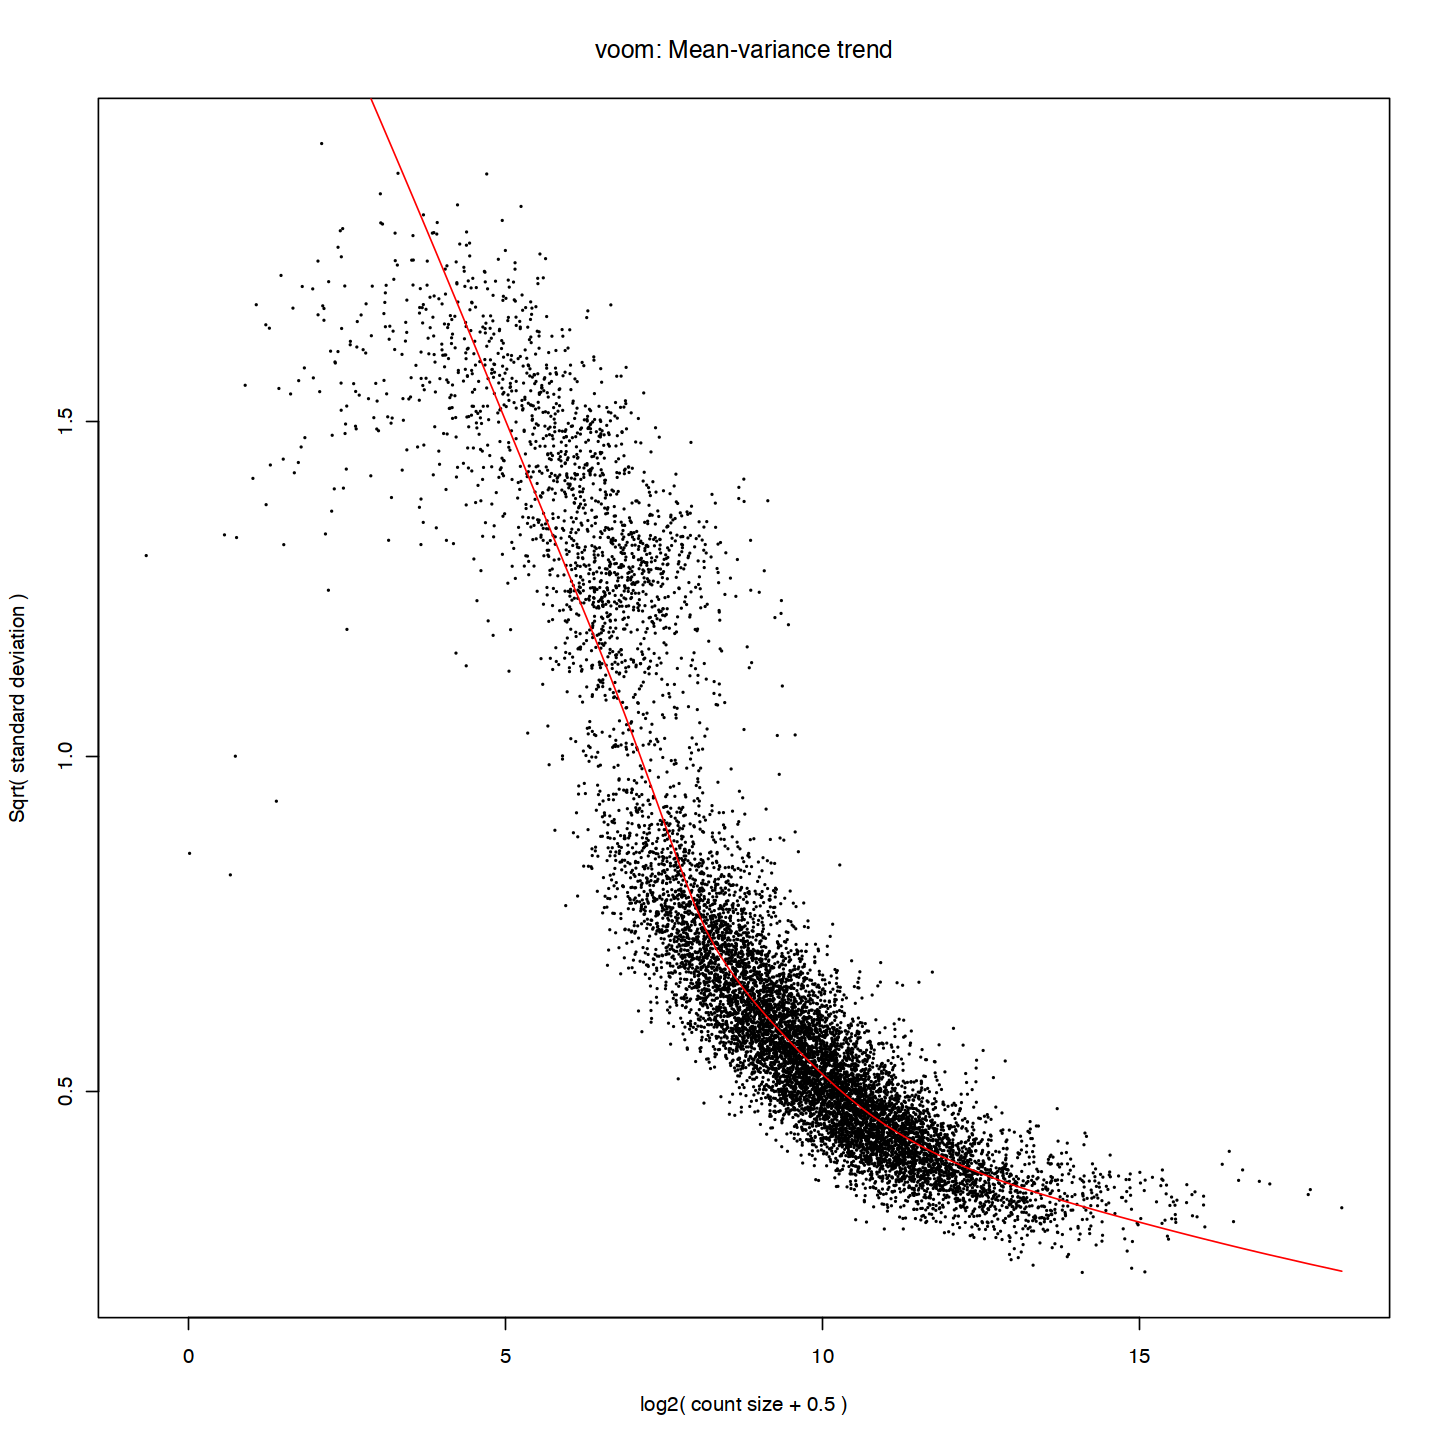

In [21]:
mm <- model.matrix(~0 + conds)
y <- voom(d, mm, plot = T)
fit <- lmFit(y, mm)
head(coef(fit))


In [22]:
norm_data = y$E
#write.csv(norm_data, "220515_BD333-300_norm_expr.csv", quote=F)

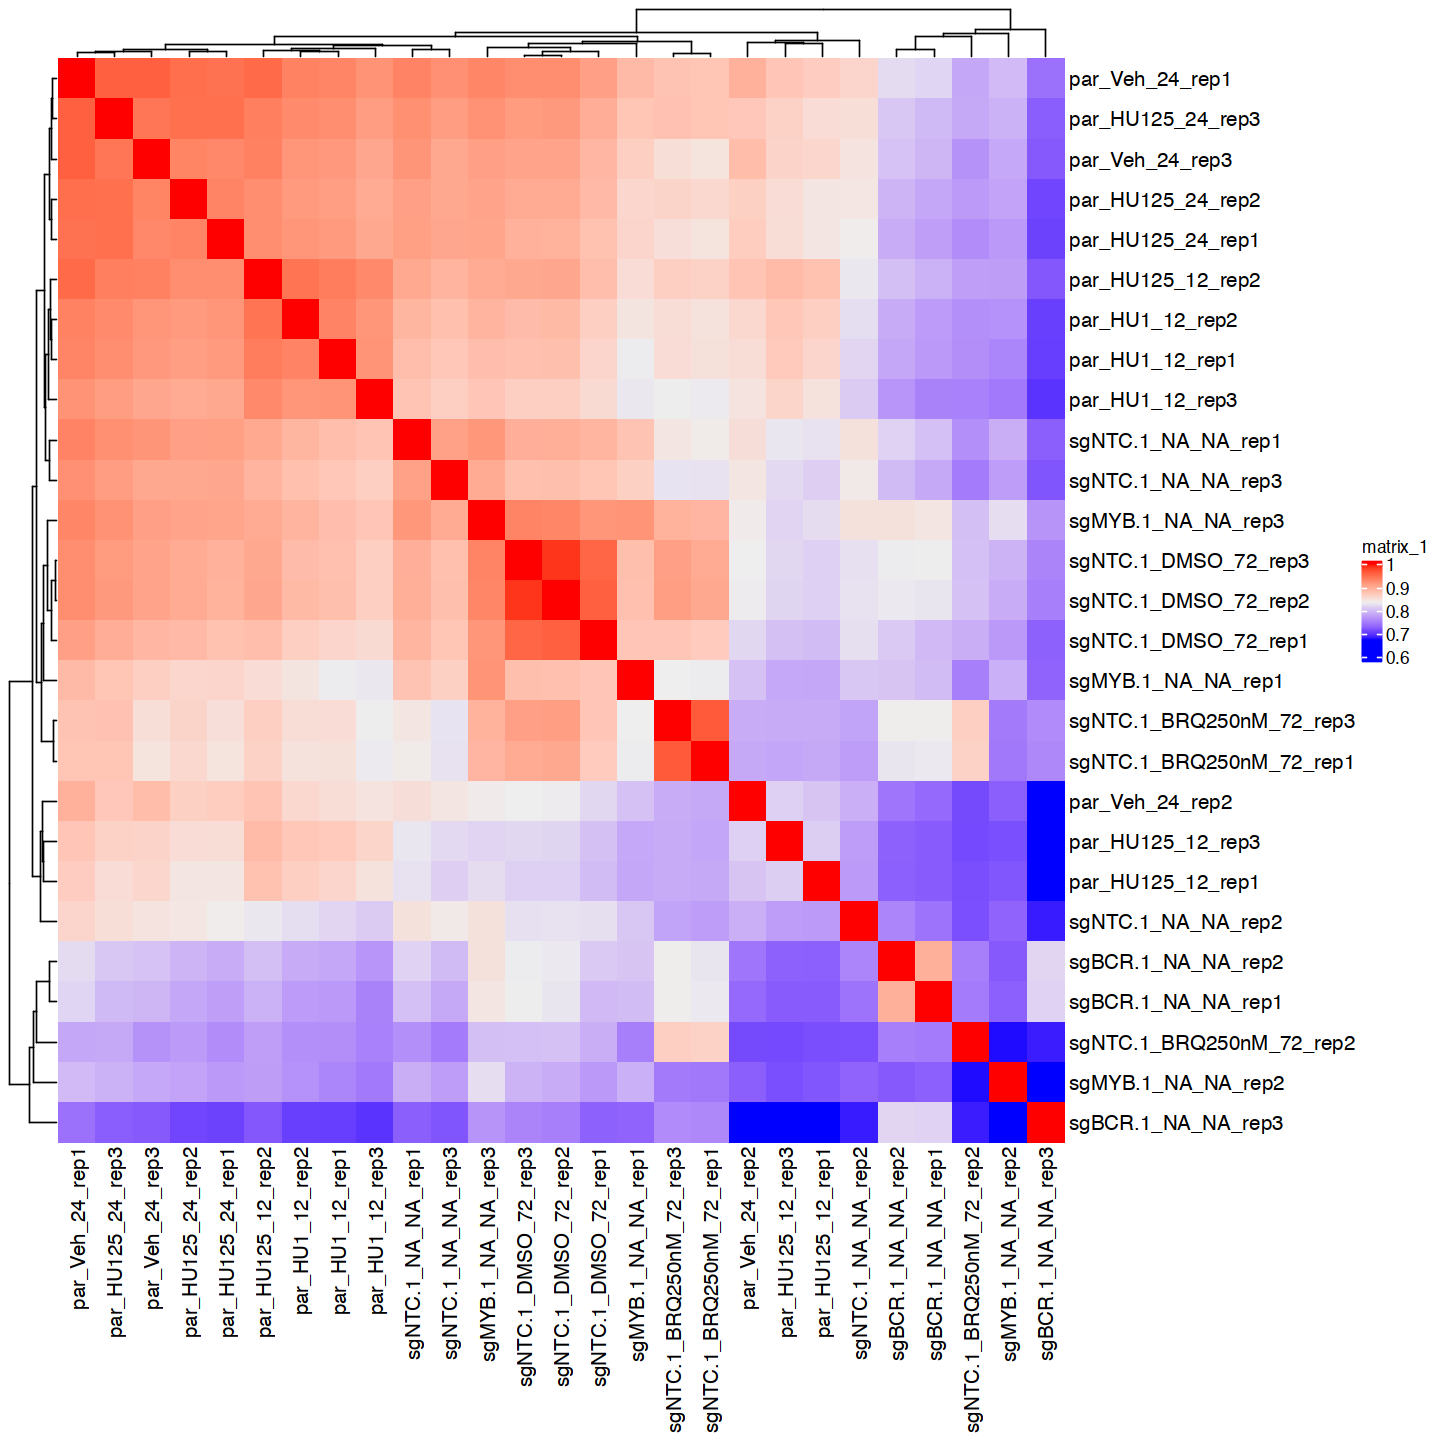

In [23]:
Heatmap(cor(y$E))

In [24]:
norm_data["HBA1",]

sgNTC.1_NA_NA_rep1       sgNTC.1_NA_NA_rep2       sgNTC.1_NA_NA_rep3 
                6.467672                 6.417058                 6.159137 
      sgMYB.1_NA_NA_rep1       sgMYB.1_NA_NA_rep2       sgMYB.1_NA_NA_rep3 
                7.289975                 7.277475                 7.145936 
      sgBCR.1_NA_NA_rep1       sgBCR.1_NA_NA_rep2       sgBCR.1_NA_NA_rep3 
                7.966692                 8.102455                 8.204093 
    sgNTC.1_DMSO_72_rep1     sgNTC.1_DMSO_72_rep2     sgNTC.1_DMSO_72_rep3 
                4.374372                 3.919127                 4.087067 
sgNTC.1_BRQ250nM_72_rep1 sgNTC.1_BRQ250nM_72_rep2 sgNTC.1_BRQ250nM_72_rep3 
                7.548921                 8.082385                 7.702675 
         par_Veh_24_rep1          par_Veh_24_rep2          par_Veh_24_rep3 
                4.459390                 3.615723                 4.836014 
       par_HU125_12_rep1        par_HU125_12_rep2        par_HU125_12_rep3 
                3.476248                 3.433551                 4.890878 
         par_HU1_12_rep1          par_HU1_12_rep2          par_HU1_12_rep3 
                4.788270                 4.483565                 5.532414 
       par_HU125_24_rep1        par_HU125_24_rep2        par_HU125_24_rep3 
                5.325388                 5.343247                 5.291186

In [25]:
process_res = function(res, fit) {
    tmp <- contrasts.fit(fit, res)
    tmp <- eBayes(tmp)
    res <- topTable(tmp, sort.by = "P", n = Inf)
    
    res["gene"] = rownames(res)
    res["nlogpval"] = -log10(res$adj.P.Val)
    res["label"] = ""
    res_up = res[res$logFC > 0,]
    res_up[order(-res_up$t),][1:100,]$label = res_up[order(-res_up$t),][1:100,]$gene
    res_down = res[res$logFC < 0,]
    res_down[order(res_down$t),][1:100,]$label = res_down[order(res_down$t),][1:100,]$gene
    res = rbind(res_up, res_down)
    res = res[order(-res$t),]
    return(res)
}

In [26]:
sgbcr <- process_res(makeContrasts(condssgBCR1_NA_NA - condssgNTC1_NA_NA, levels = colnames(coef(fit))), fit)
sgmyb <- process_res(makeContrasts(condssgMYB1_NA_NA - condssgNTC1_NA_NA, levels = colnames(coef(fit))), fit)
hu125_12 <- process_res(makeContrasts(condspar_HU125_12 - condspar_Veh_24, levels = colnames(coef(fit))), fit)
hu125_24 <- process_res(makeContrasts(condspar_HU125_24 - condspar_Veh_24, levels = colnames(coef(fit))), fit)
hu1_12 <- process_res(makeContrasts(condspar_HU1_12 - condspar_Veh_24, levels = colnames(coef(fit))), fit)
brq = process_res(makeContrasts(condssgNTC1_BRQ250nM_72 - condssgNTC1_DMSO_72, levels = colnames(coef(fit))), fit)


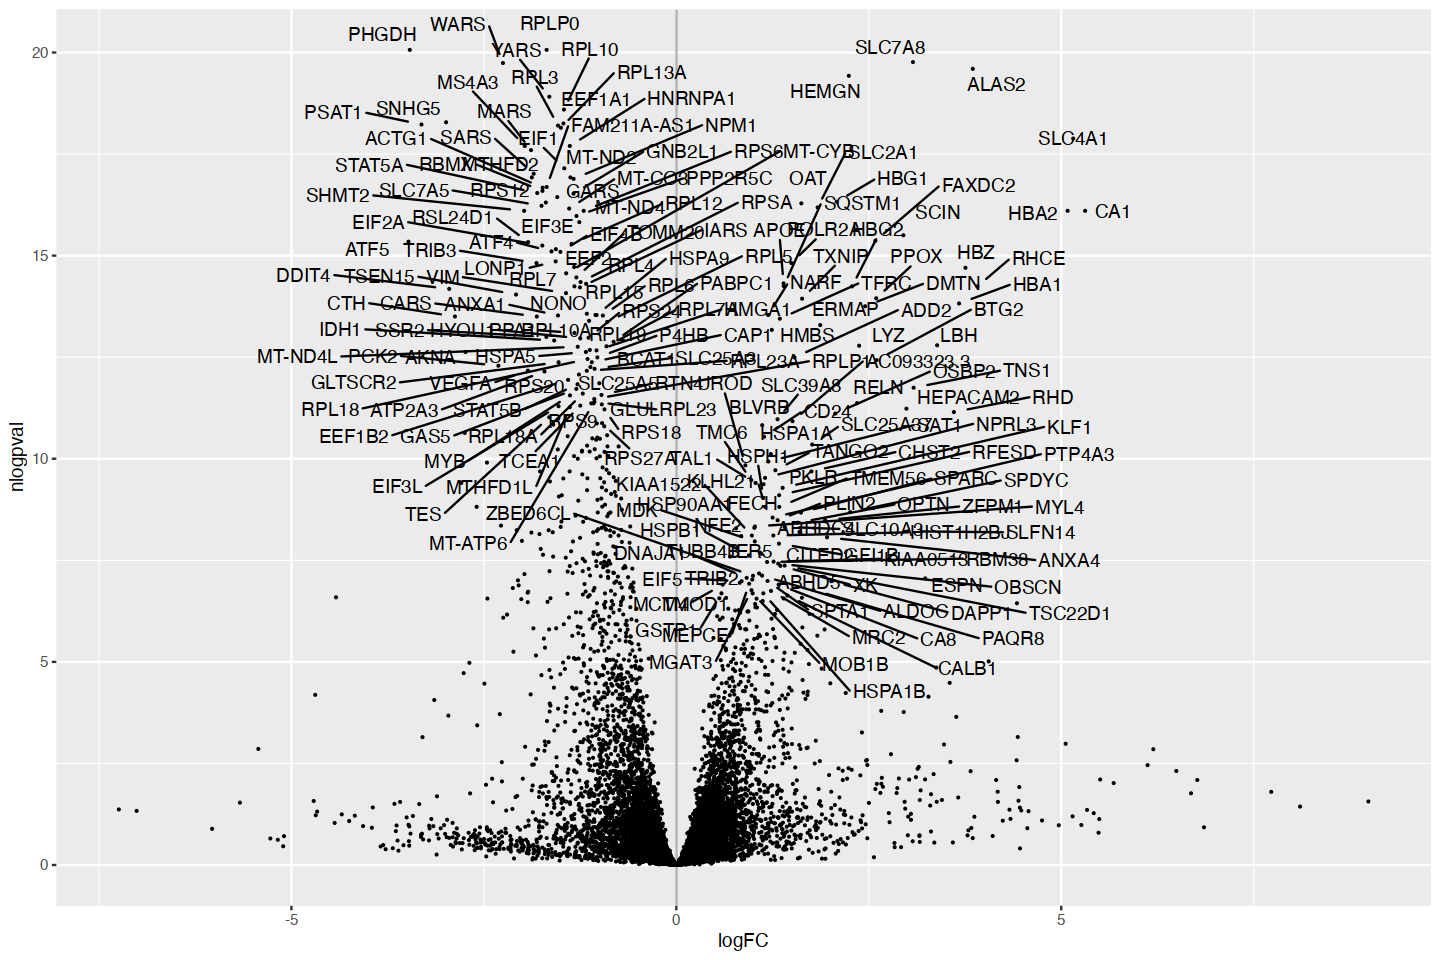

In [27]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(brq, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 51 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


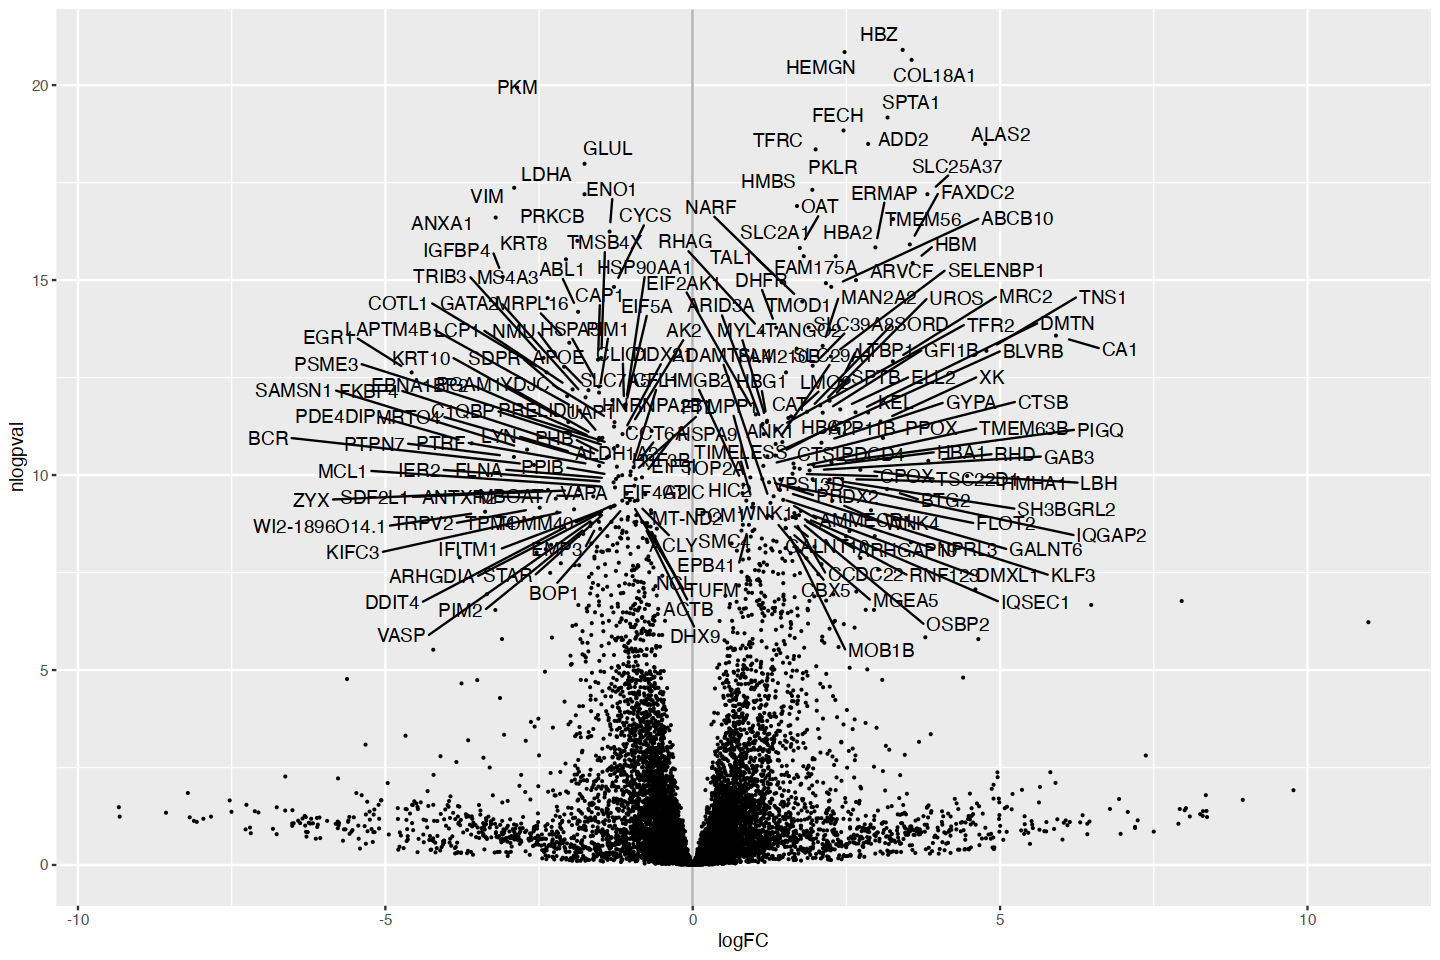

In [28]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(sgbcr, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 95 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


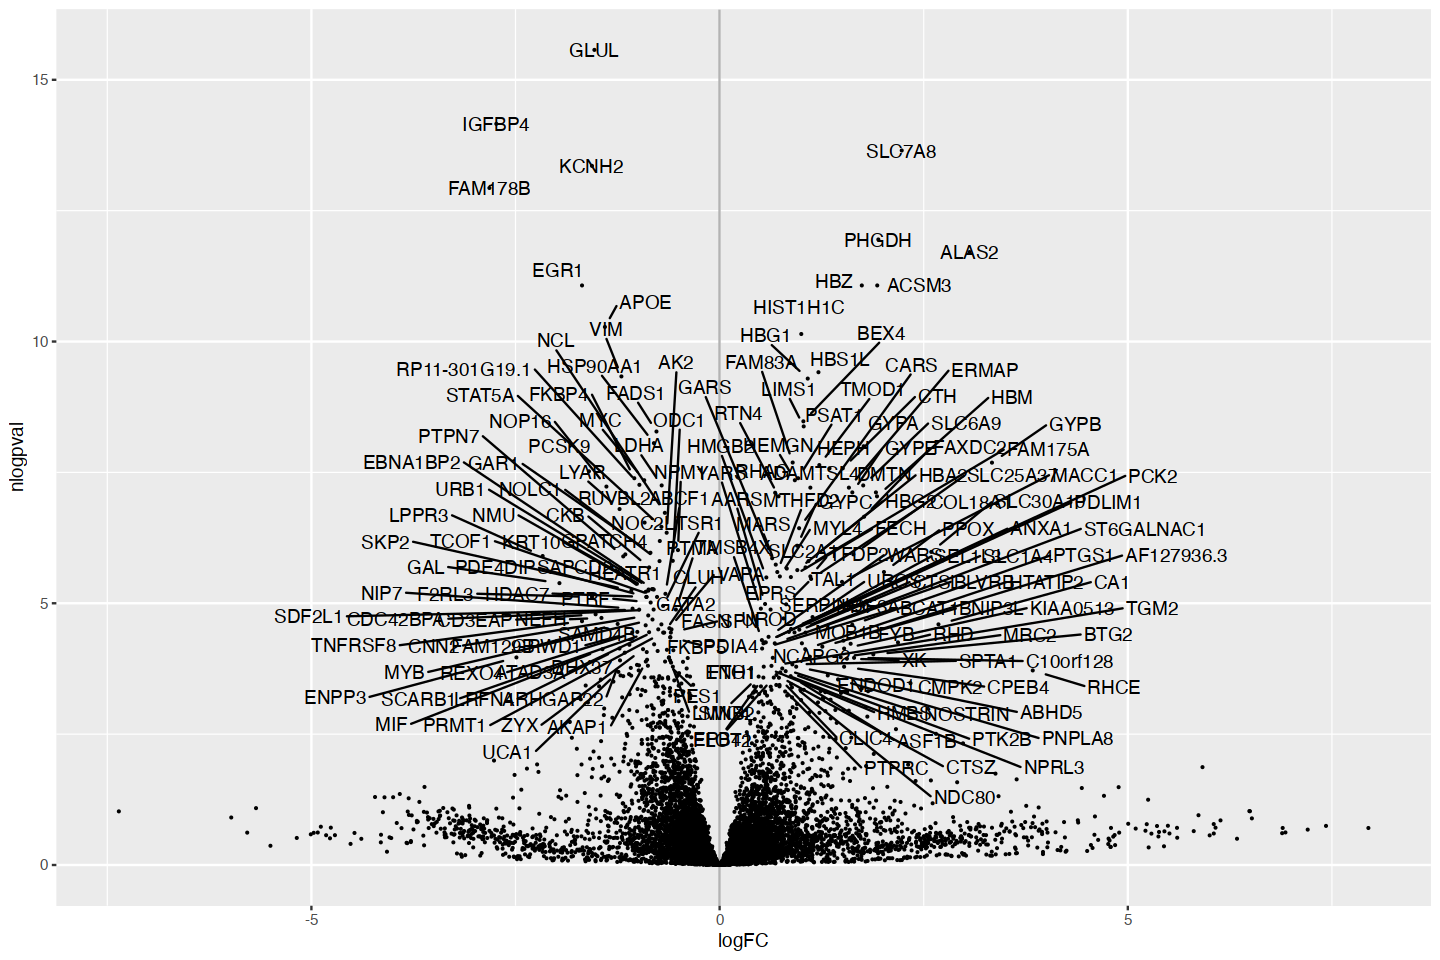

In [29]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(sgmyb, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

In [30]:
sgmyb[c("GATA1", "KLF1"),]

logFC      AveExpr  t         P.Value    adj.P.Val B         gene 
GATA1 0.17044794 8.083526 1.7237865 0.09296048 0.2917919 -5.590773 GATA1
KLF1  0.09879238 7.763157 0.6268876 0.53452078 0.7497371 -6.748242 KLF1 
      nlogpval  label
GATA1 0.5349268      
KLF1  0.1250910

Warning message:
"ggrepel: 115 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


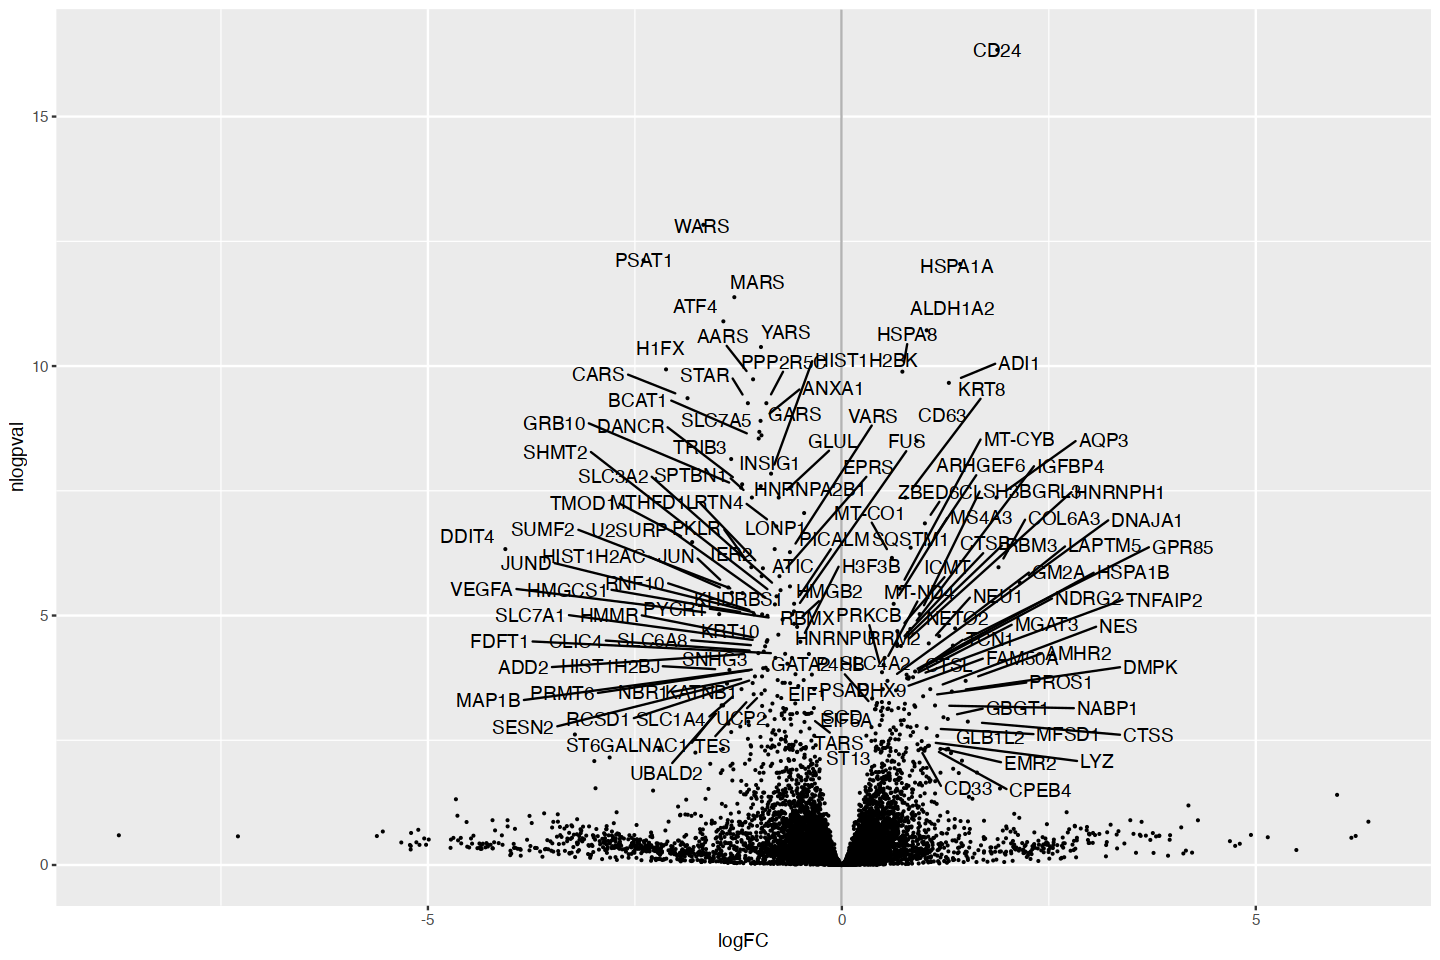

In [31]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(hu125_12, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 121 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


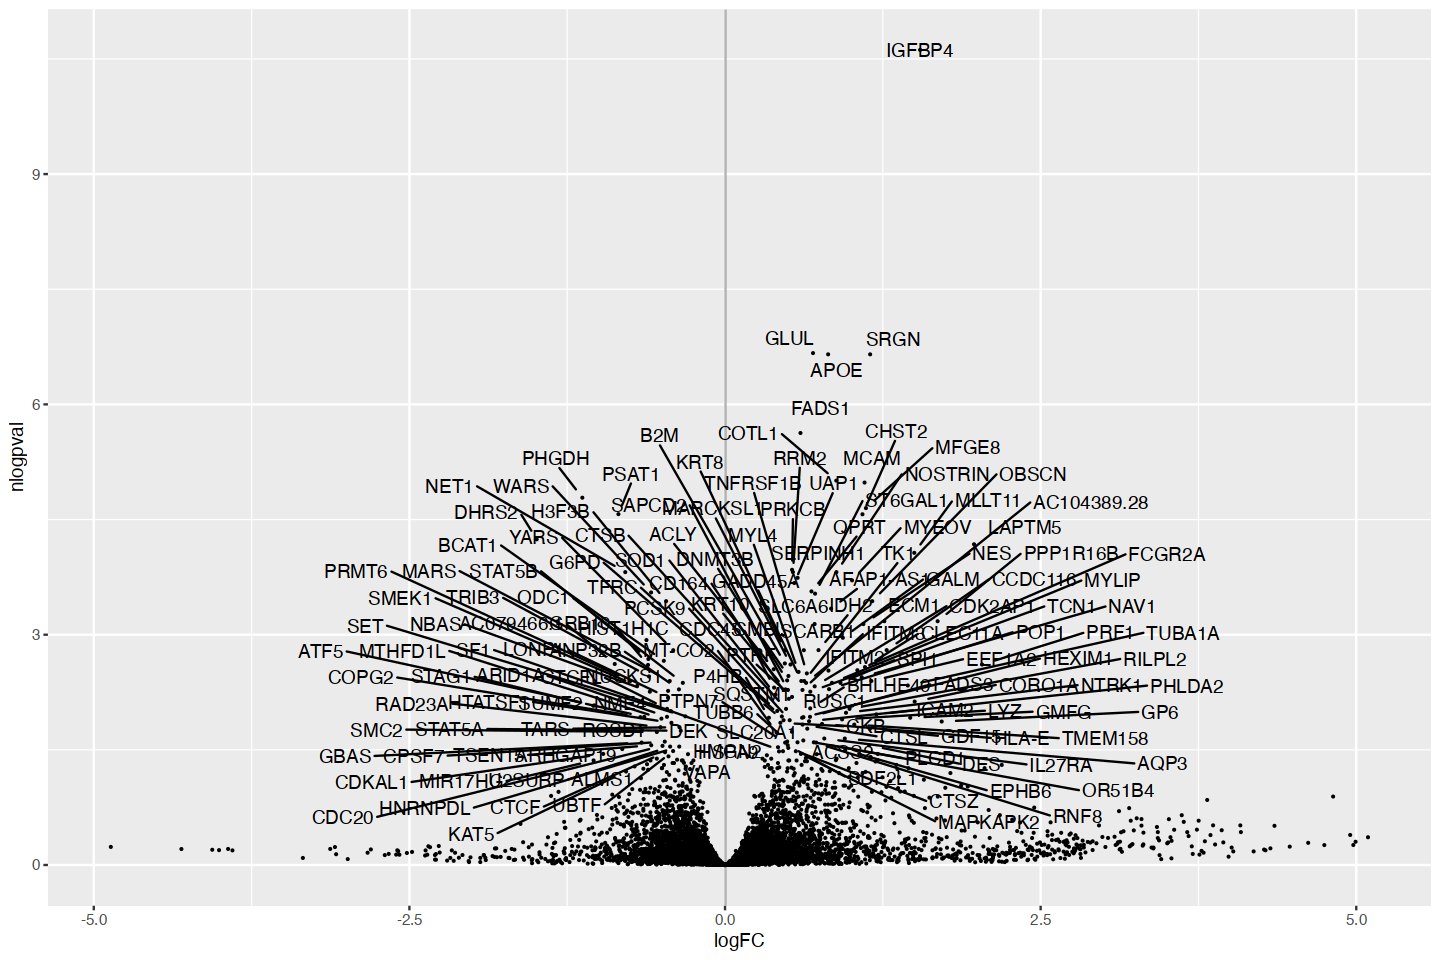

In [32]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(hu125_24, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


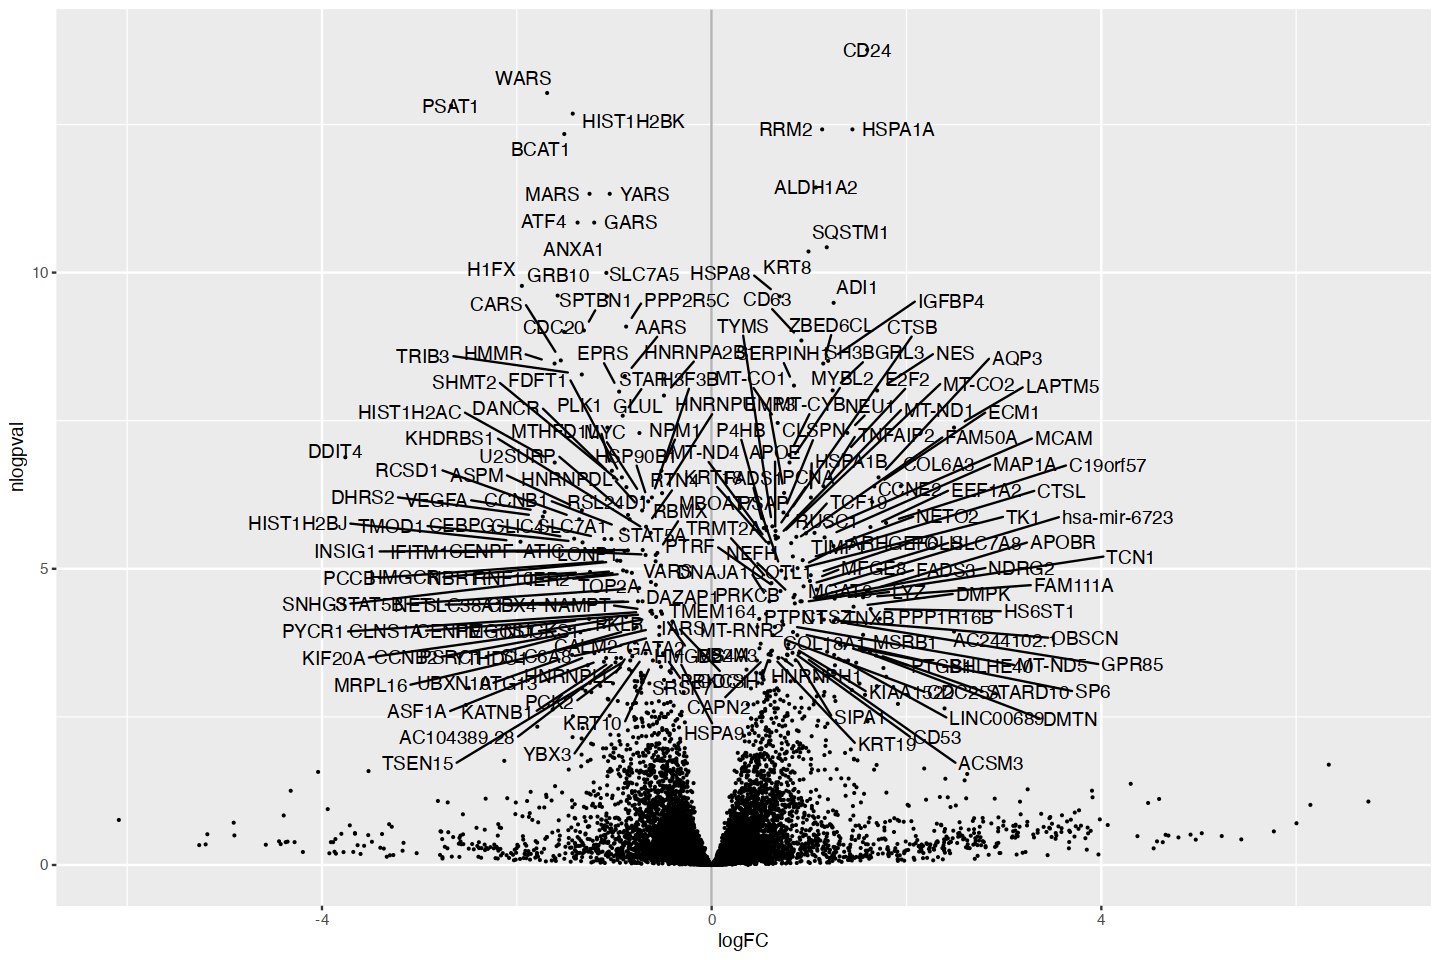

In [33]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(hu1_12, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

In [34]:
z = rownames(sgbcr)
genes = data.frame(cbind(sgbcr[z, "logFC"], sgmyb[z, "logFC"], 
                         brq[z, "logFC"],
                         hu125_12[z, "logFC"], hu1_12[z, "logFC"], hu125_24[z, "logFC"]))
rownames(genes) = z
colnames(genes) = c("sgbcr", "sgmyb", "brq", "hu125_12", "hu1_12", "hu125_24")

head(genes)

sgbcr    sgmyb     brq      hu125_12   hu1_12      hu125_24    
HBZ     3.415213 1.7417327 3.755536  0.1855766  0.37292182  0.406097936
HEMGN   2.470092 0.9214121 2.240520 -0.4281521 -0.12720757  0.412850985
COL18A1 3.560506 1.1208721 0.613233  0.6365256  0.87974666  0.016502022
SPTA1   3.169265 0.8908508 1.184947 -0.2301938 -0.05043968 -0.281516362
FECH    2.453007 0.8729195 1.013256 -0.4249178 -0.34474187 -0.376962883
ALAS2   4.758726 3.0610083 3.850982 -0.3478270  0.30626855  0.009890424

In [35]:
genes[c("SLC25A37", "ALAS2", "AHSP", "HBG1", "HBG2", "HBA1", "HBB", "GYPA", "GYPB", "MS4A3", "SLC7A8", "EGR1",
"RHCE", "AIF1", "CD24", "CEBPE", "ITGB7", "LYZ", "HDC", "BCR", "ABL1", "SLC2A1", "GATA1", "MYB", "SPI1", "CEBPA", "RUNX1"),]

sgbcr       sgmyb      brq         hu125_12    hu1_12     
SLC25A37  3.81699708  1.6377061  1.76475142 -0.02028251  0.18319464
ALAS2     4.75872645  3.0610083  3.85098164 -0.34782704  0.30626855
AHSP      4.59816123  1.5533525  3.37688424 -0.04768372  2.14431205
HBG1      1.21006833  1.0794910  2.08230471 -0.41395966 -0.24505181
HBG2      1.45737632  0.9515503  2.28288001 -0.15119635 -0.31381735
HBA1      1.74010152  0.8858224  3.67261888 -0.45569673  0.57751935
HBBP1     0.95458177  1.2231436  1.61308274 -0.91055333 -0.35306820
GYPA      2.09385571  1.7641674  0.45996783 -0.20570976  0.10421164
GYPB      3.01624286  3.3360020  1.63122634  0.06095778  0.04097379
MS4A3    -2.36043033 -0.4018896 -1.96868846  0.62600332  0.49099215
SLC7A8    0.57477531  2.2305502  3.07401177  0.63310748  0.94343828
EGR1     -4.57229078 -1.6852861 -1.05034624 -2.80504400 -1.42784336
RHCE      4.64628763  3.8353941  3.91213328  0.93346089  1.05735180
AIF1     -3.90998668  1.6962369  3.55103979 -0.21011489  0.66375814
CD24     -3.13511677  0.2624762  1.13999012  1.87715417  1.59715423
CEBPE    -0.04977356  1.7037854  7.72803487  0.42026092  0.37472256
ITGB7     3.27804450  1.1325825  3.47710210  1.20421574 -1.03302621
LYZ      -1.79184765  1.0435914  2.37426535  0.96452214  1.26253031
HDC      -1.16724668 -3.1571055  2.50144126  0.40335968  0.94025953
BCR      -2.58371822 -0.4772913  0.35000405 -0.22390175  0.06656932
ABL1     -1.86444055 -0.2314476  0.26163316  0.04550078  0.12859355
SLC2A1    1.80642523  0.8226466  1.83565201 -0.18429511  0.22812533
GATA1     0.31073209  0.1704479  0.06951296  0.21954271  0.24019346
MYB      -1.10268068 -0.8220617 -1.38134358  0.20176456 -0.09563338
SPI1     -1.22824137  0.8085481 -0.02878818  0.25541028  0.42972826
NA                NA         NA          NA          NA          NA
RUNX1    -0.95245212  0.1431133  0.37339983 -0.30525653 -0.18094994
         hu125_24    
SLC25A37  0.413953209
ALAS2     0.009890424
AHSP      2.094697062
HBG1      0.397035490
HBG2      0.556446549
HBA1      0.982826763
HBBP1     0.311719706
GYPA      0.290893675
GYPB      0.434059887
MS4A3    -0.042705568
SLC7A8    0.416035755
EGR1      0.730393011
RHCE      0.955882909
AIF1      0.259331426
CD24      0.268176869
CEBPE     0.427773011
ITGB7     0.980225675
LYZ       0.927371379
HDC       0.992497083
BCR      -0.115146188
ABL1     -0.042439478
SLC2A1   -0.129026629
GATA1     0.218697509
MYB      -0.045600886
SPI1      0.914534808
NA                 NA
RUNX1     0.252218272

In [36]:
norm_data_hm = norm_data[,c(1:3, 7:15)]
norm_data_hm[,1:6] = sweep(norm_data_hm[,1:6], 1, apply(norm_data_hm[,1:3], 1, mean), `-`)
norm_data_hm[,7:12] = sweep(norm_data_hm[,7:12], 1, apply(norm_data_hm[,7:9], 1, mean), `-`)
head(norm_data_hm)

sgNTC.1_NA_NA_rep1 sgNTC.1_NA_NA_rep2 sgNTC.1_NA_NA_rep3
WASH7P         0.16873981        -0.50359995         0.33486014       
RP11-34P13.7  -0.11824270        -0.86282868         0.98107139       
AP006222.2     0.16918893         0.05783348        -0.22702241       
RP4-669L17.10 -1.40315422         1.24180408         0.16135014       
MTND1P23       0.17244161         0.36799474        -0.54043635       
MTND2P28      -0.05302427        -0.01061570         0.06363997       
              sgBCR.1_NA_NA_rep1 sgBCR.1_NA_NA_rep2 sgBCR.1_NA_NA_rep3
WASH7P         1.7933745          1.3997552          1.6047243        
RP11-34P13.7  -1.0154998          1.5620835          1.2034542        
AP006222.2     1.2764817          1.2212614          1.4186131        
RP4-669L17.10  2.7782676         -0.9413289         -1.8007502        
MTND1P23      -0.4473686         -0.3146786         -1.2699399        
MTND2P28      -0.7283588         -0.4602081         -0.8790921        
              sgNTC.1_DMSO_72_rep1 sgNTC.1_DMSO_72_rep2 sgNTC.1_DMSO_72_rep3
WASH7P        -0.77080209           0.12049557           0.65030652         
RP11-34P13.7  -0.90518561           0.57425441           0.33093119         
AP006222.2    -0.63790930           0.44438475           0.19352455         
RP4-669L17.10 -1.84037083           0.77343735           1.06693349         
MTND1P23      -0.09228664           0.06959432           0.02269232         
MTND2P28       0.14637254          -0.14404050          -0.00233204         
              sgNTC.1_BRQ250nM_72_rep1 sgNTC.1_BRQ250nM_72_rep2
WASH7P         0.9014014               -0.01564655             
RP11-34P13.7   0.7447900               -0.10639896             
AP006222.2     1.6753530                1.88895416             
RP4-669L17.10 -0.4401973                0.30187350             
MTND1P23      -0.1963359                0.59895184             
MTND2P28      -1.5607557               -0.44633046             
              sgNTC.1_BRQ250nM_72_rep3
WASH7P         1.0210984              
RP11-34P13.7   1.5368253              
AP006222.2     1.7619729              
RP4-669L17.10  0.6185083              
MTND1P23      -0.3659344              
MTND2P28      -1.2993645

In [37]:
norm_data_hm[c("BCR", "ABL1", "KLF1"),]

sgNTC.1_NA_NA_rep1 sgNTC.1_NA_NA_rep2 sgNTC.1_NA_NA_rep3
BCR  -0.01656242        -0.13274137         0.14930379       
ABL1 -0.07696721         0.03028204         0.04668517       
KLF1 -0.26193214         0.37416442        -0.11223228       
     sgBCR.1_NA_NA_rep1 sgBCR.1_NA_NA_rep2 sgBCR.1_NA_NA_rep3
BCR  -2.308737          -2.143249          -3.445076         
ABL1 -1.638340          -1.857806          -2.156256         
KLF1  1.140175           1.351680           1.064220         
     sgNTC.1_DMSO_72_rep1 sgNTC.1_DMSO_72_rep2 sgNTC.1_DMSO_72_rep3
BCR  0.24960199           -0.02970703          -0.21989496         
ABL1 0.09487711            0.02178154          -0.11665865         
KLF1 0.12426611           -0.09709207          -0.02717404         
     sgNTC.1_BRQ250nM_72_rep1 sgNTC.1_BRQ250nM_72_rep2 sgNTC.1_BRQ250nM_72_rep3
BCR  0.4042398                0.2779804                0.2939711               
ABL1 0.2234218                0.2589918                0.2825385               
KLF1 1.1259647                1.7734892                1.2776263

pdf 
  2

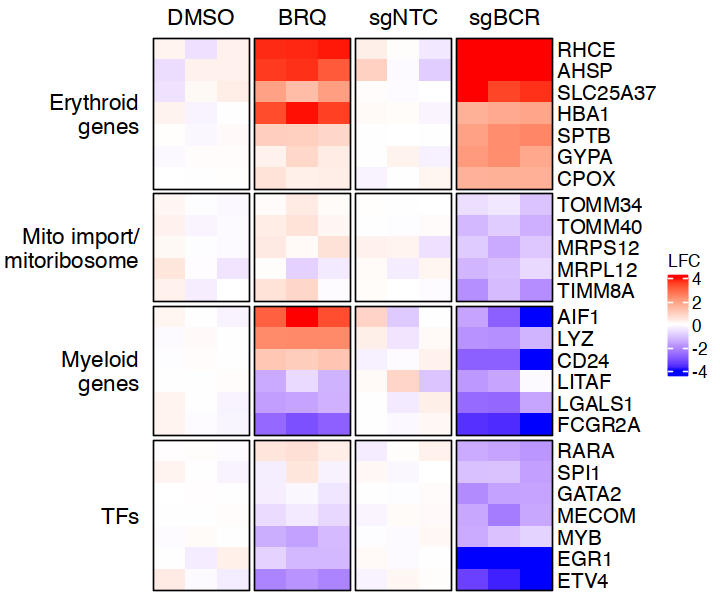

In [38]:

# heme = c("SLC25A37", "GYPA", "GYPB", "SLC2A1", "HBG1", "SPTB", "FECH", "CPOX", "UROS", "RHCE")
# tfs = c("SPI1", "MECOM", "CBFB", "RARA", "GATA2", "GATA1", "MYB", "EGR1", "ETV4")
# mye = c( "FCGR2A", "LITAF", "LGALS1", "AIF1", "HDC", "LYZ", "CD24", "RELB")
# mito = c("TOMM40", "TOMM34", "TIMM10", "TIMM8A", "MRPL16", "MRPL12", "MRPS12")


heme = c("SLC25A37", "GYPA", "HBA1", "AHSP", "SPTB", "CPOX", "RHCE")
tfs = c("SPI1", "MECOM", "RARA", "GATA2", "MYB", "EGR1", "ETV4")
mye = c( "FCGR2A", "LITAF", "LGALS1", "AIF1", "LYZ", "CD24")
mito = c("TOMM40", "TOMM34", "TIMM8A", "MRPL12", "MRPS12")
goi = c(heme, tfs, mye, mito)

col_fun = colorRamp2(c(-4,0,4), c("blue", "white", "red"))

options(repr.plot.width=6, repr.plot.height=5)
h = Heatmap(norm_data_hm[goi,], cluster_columns=F, col=col_fun, border=T,
column_split=factor(c(rep("sgNTC",3), rep("sgBCR", 3), rep("DMSO", 3), rep("BRQ", 3)),
levels=c("DMSO", "BRQ", "sgNTC", "sgBCR")),
column_names_side=NULL,
show_row_dend = FALSE,
row_title_rot=0, 
show_column_names = FALSE,
name="LFC",
row_split=c(rep("Erythroid\ngenes", length(heme)), rep("TFs", length(tfs)), 
            rep("Myeloid\ngenes", length(mye)), rep("Mito import/\nmitoribosome", length(mito))))

draw(h)

pdf("../output/220516_bd333-300_sgBCR_BRQ_heatmap.pdf", width=6, height=4)
draw(h)
dev.off()


In [39]:
require(fgsea)
# primary erythroid data from supplemental tables in Ludwig et al. 2019

cd34_data = read_excel("../data/220303_ludwig_mmc4.xlsx")
diff_p7p8_hscmpp = apply(cd34_data[,c("P5", "P6")], 1, mean) - apply(cd34_data[,c("HSC", "MPP")], 1, mean)
cd34_data$diff_p7p8_hscmpp = diff_p7p8_hscmpp

diff_hscmpp_p7p8 = apply(cd34_data[,c("HSC", "MPP")], 1, mean) - apply(cd34_data[,c("P5", "P6")], 1, mean)
cd34_data$diff_hscmpp_p7p8 = diff_hscmpp_p7p8

head(cd34_data)


Loading required package: fgsea



gene          cluster HSC  MPP  CMP  MEP  P1   P2   P3   P4   P5   P6   P7  
1 TULP2         K7      1.09 0.68 0.32 0.39 0.30 0.08 0.26 0.44 0.15 0.45 1.87
2 ATF3          K7      5.64 5.16 4.03 2.15 2.06 1.11 1.21 2.23 3.69 3.28 3.83
3 HBA1          K6      0.00 0.00 0.00 0.07 2.37 5.55 5.25 6.20 8.62 9.37 9.91
4 RP11-874J12.4 K7      0.00 0.00 0.20 0.47 0.97 1.54 1.09 0.78 1.14 1.18 1.76
5 TRIB3         K6      3.06 2.86 3.19 2.46 5.32 4.01 3.18 3.88 7.73 7.76 7.17
6 KIF5A         K2      4.30 4.23 1.98 1.78 1.34 2.44 3.30 4.66 3.69 1.22 0.97
  P8    diff diff_p7p8_hscmpp diff_hscmpp_p7p8
1  4.43 2.56 -0.585            0.585          
2  6.26 2.43 -1.915            1.915          
3 12.31 2.40  8.995           -8.995          
4  4.07 2.31  1.160           -1.160          
5  9.42 2.25  4.785           -4.785          
6  3.20 2.23 -1.810            1.810

In [40]:
shared_genes = intersect(cd34_data$gene, row.names(brq))
cd34_data = cd34_data[which(cd34_data$gene %in% shared_genes),]
cd34_up = cd34_data[order(cd34_data$diff_hscmpp_p7p8),][1:500,]$gene
cd34_down = cd34_data[order(-cd34_data$diff_hscmpp_p7p8),][1:500,]$gene

pathways = list()
pathways[[1]] = cd34_up
pathways[[2]] = cd34_down
names(pathways) = c("top", "bottom")

length(cd34_up)
length(cd34_down)


[1] 500

[1] 500

In [41]:
options(repr.plot.height=3, repr.plot.width=6)

brq_lfc = brq$logFC
names(brq_lfc) = rownames(brq)

require(fgsea)
pdf("../output/220516_k562_brq_up_gsea.pdf", width=3.5, height=1.6)
plotEnrichment(pathways[["top"]],
               brq_lfc) + labs(title="Genes upregulated in erythroblasts") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"))
dev.off()


pdf("../output/220516_k562_brq_down_gsea.pdf", width=3.5, height=1.6)
plotEnrichment(pathways[["bottom"]],
               brq_lfc) + labs(title="Genes upregulated in HSCs/MPPs") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"))
dev.off()

fgseaSimple(pathways, brq_lfc, nperm=5000)[,1:7]


pdf 
  2

pdf 
  2

pathway pval         padj        ES         NES       nMoreExtreme size
1 top     0.0007936508 0.001587302  0.5283396  2.420817   0          500 
2 bottom  0.0654730091 0.065473009 -0.2796210 -1.187982 244          500

In [42]:
options(repr.plot.height=3, repr.plot.width=6)

sgbcr_lfc = sgbcr$logFC
names(sgbcr_lfc) = rownames(sgbcr)

require(fgsea)
pdf("../output/220516_k562_sgbcr_up_gsea.pdf", width=3.5, height=1.6)
plotEnrichment(pathways[["top"]],
               sgbcr_lfc) + labs(title="Genes upregulated in erythroblasts") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"))
dev.off()


pdf("../output/220516_k562_sgbcr_down_gsea.pdf", width=3.5, height=1.6)
plotEnrichment(pathways[["bottom"]],
               sgbcr_lfc) + labs(title="Genes upregulated in HSCs/MPPs") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"))
dev.off()

fgseaSimple(pathways, sgbcr_lfc, nperm=5000)[,1:7]


pdf 
  2

pdf 
  2

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.06% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway pval         padj         ES         NES       nMoreExtreme size
1 top     0.0003471017 0.0004714757  0.5362150  2.264669 0            500 
2 bottom  0.0004714757 0.0004714757 -0.4416822 -1.905798 0            500

Warning message:
"ggrepel: 1606 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


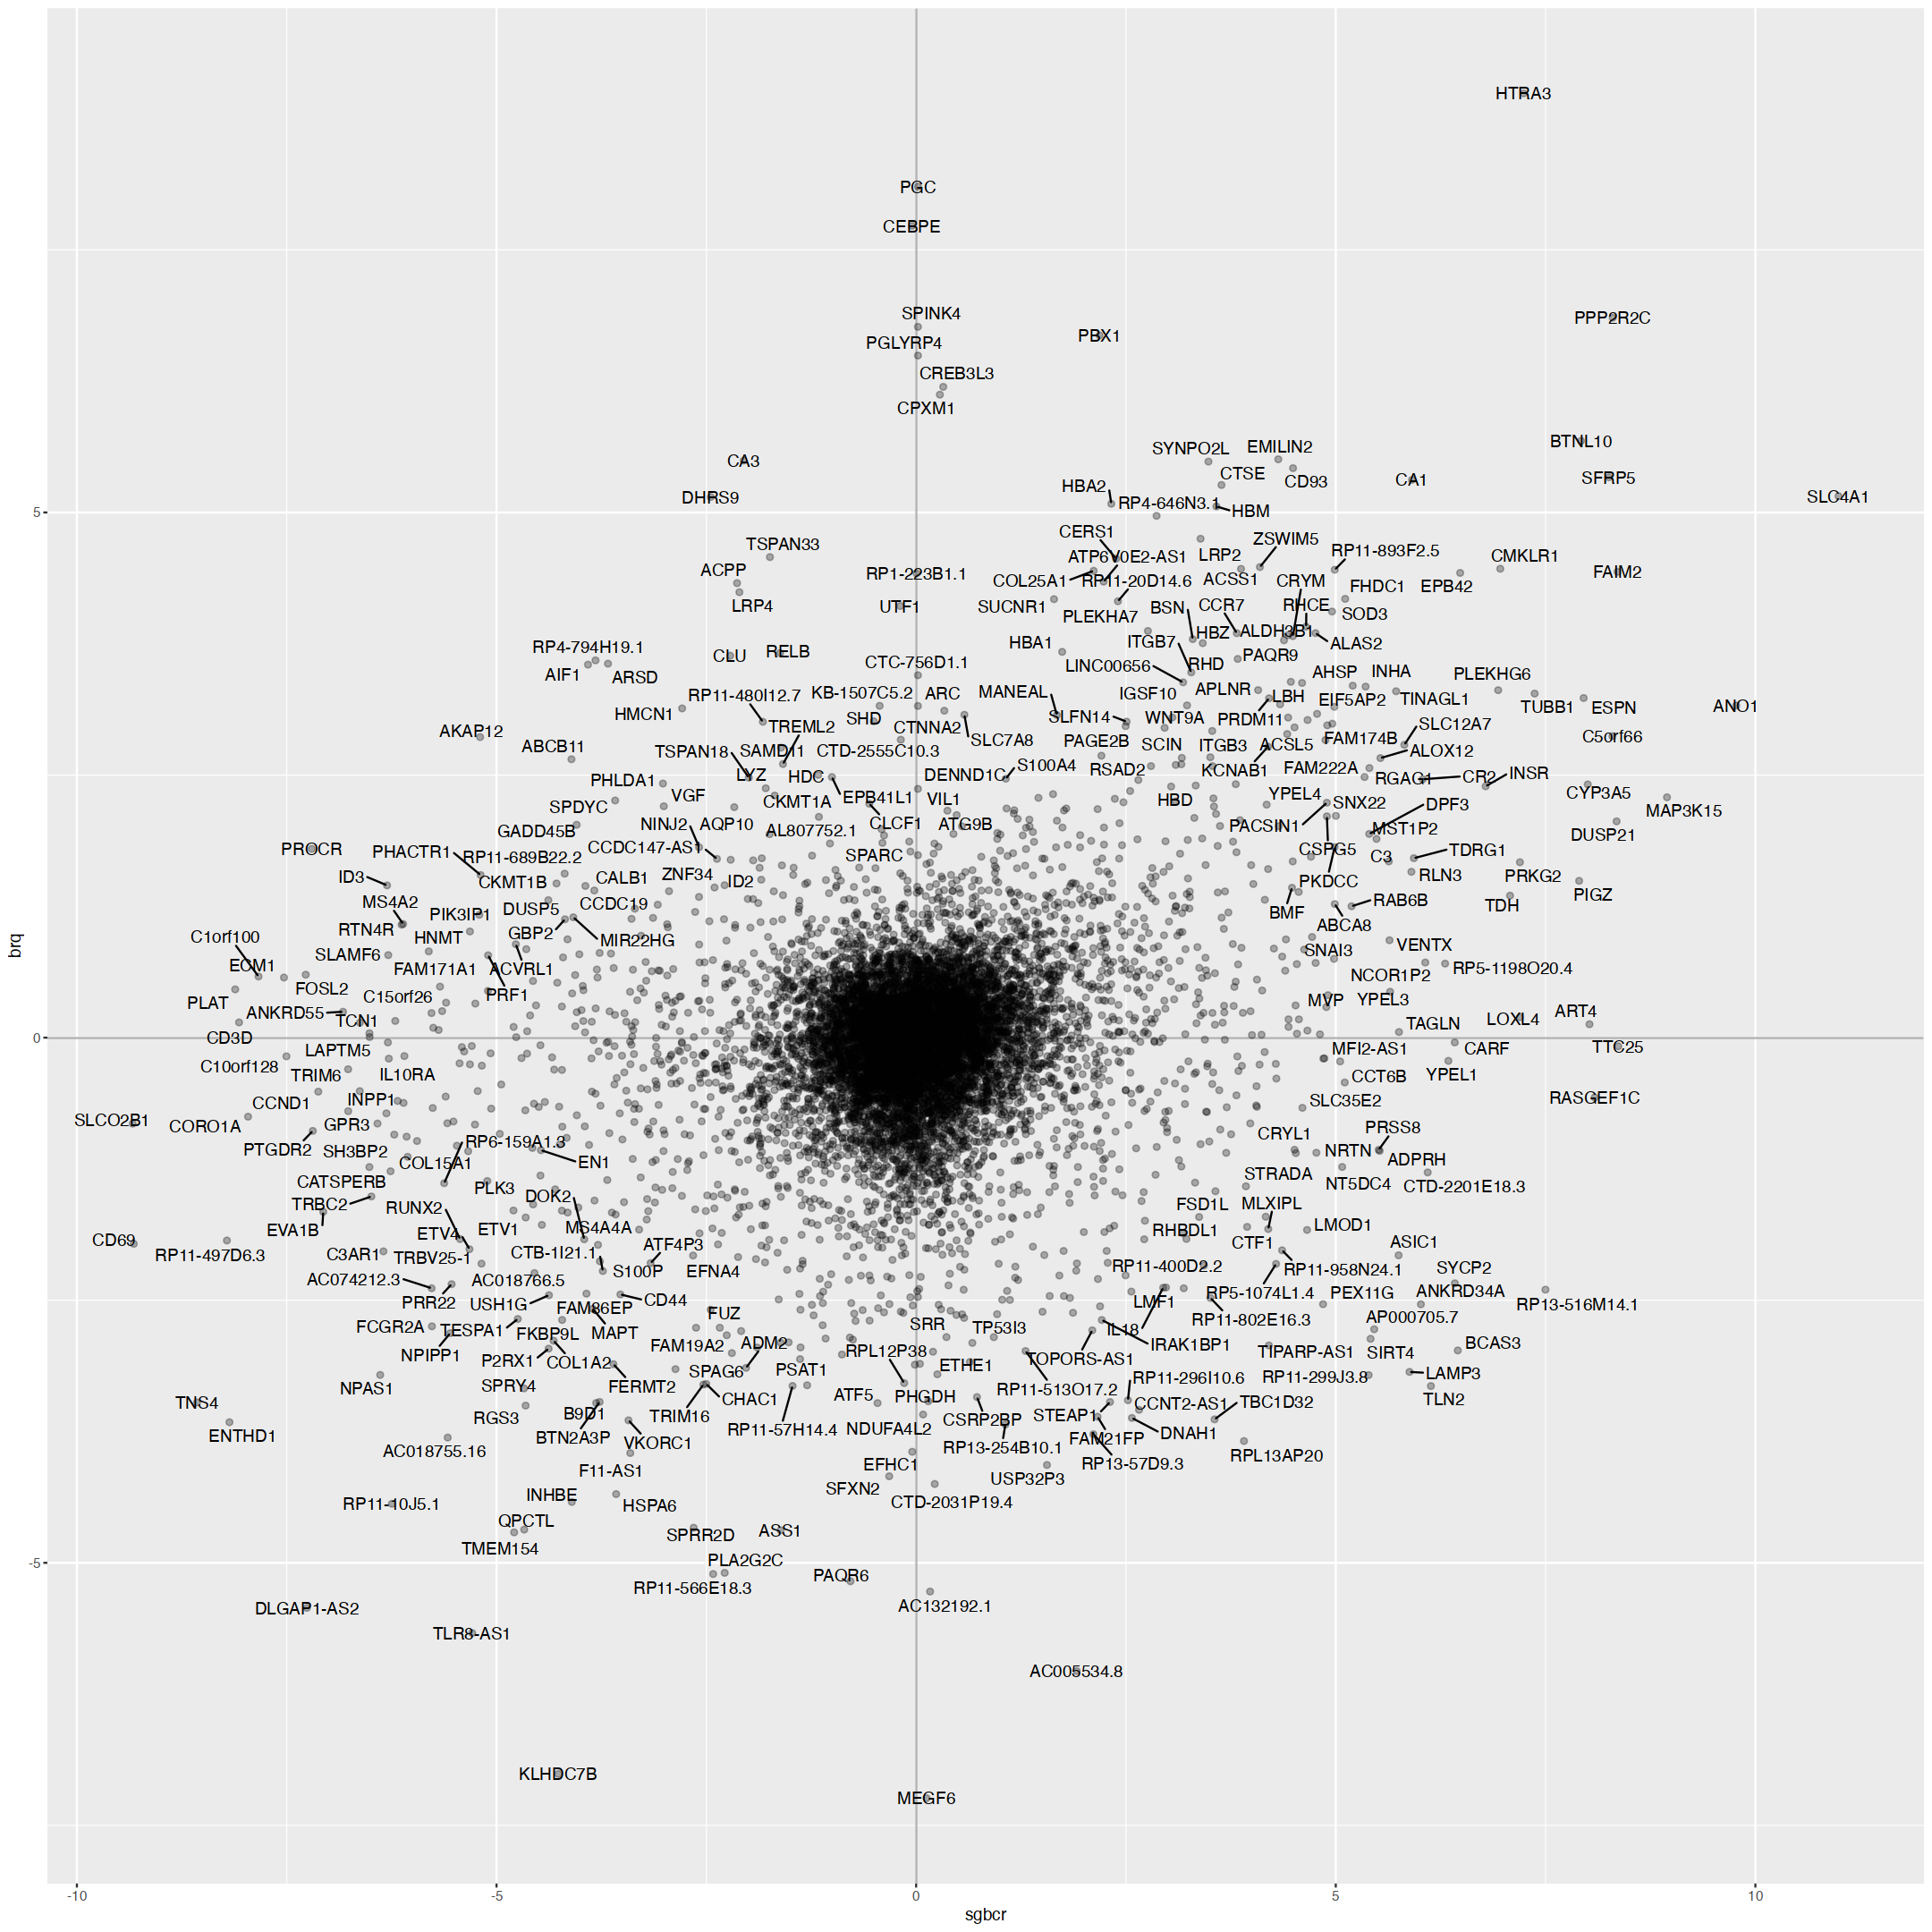

In [43]:
options(repr.plot.height=18, repr.plot.width=18)

genes$label = ""
interesting_genes = union(rownames(subset(sgbcr, adj.P.Val < 1e-7 | abs(logFC) > 2)),
                          rownames(subset(brq, adj.P.Val < 1e-7 | abs(logFC) > 2)))
genes[interesting_genes,]$label = interesting_genes
ggplot(genes, aes(x=sgbcr, y=brq, label=label)) + geom_point(alpha=0.3) + 
geom_text_repel(max.overlaps=10) + geom_hline(yintercept=0, alpha=0.3) + geom_vline(xintercept=0, alpha=0.3)

In [45]:
sgbcr_up = rownames(subset(sgbcr, logFC > 1 & adj.P.Val < 0.05))
brq_up = rownames(subset(brq, logFC > 1 & adj.P.Val < 0.05))

intersect(sgbcr_up, brq_up)

[1] "HBZ"                "HEMGN"              "SPTA1"             
  [4] "FECH"               "ALAS2"              "ADD2"              
  [7] "TFRC"               "PKLR"               "SLC25A37"          
 [10] "HMBS"               "TMEM56"             "FAXDC2"            
 [13] "ERMAP"              "OAT"                "SLC2A1"            
 [16] "HBA2"               "HBM"                "NARF"              
 [19] "TAL1"               "CA1"                "TANGO2"            
 [22] "TNS1"               "MRC2"               "SLC39A8"           
 [25] "LTBP1"              "UROS"               "ELL2"              
 [28] "DMTN"               "KEL"                "GFI1B"             
 [31] "LMO2"               "HBG1"               "XK"                
 [34] "MYL4"               "PPOX"               "HBG2"              
 [37] "BLVRB"              "RHD"                "HBA1"              
 [40] "TSC22D1"            "LBH"                "SH3BGRL2"          
 [43] "BTG2"               "NPRL3"              "OSBP2"             
 [46] "RELN"               "SCIN"               "GAB1"              
 [49] "CITED2"             "C17orf99"           "FAM53B"            
 [52] "ABHD5"              "EPOR"               "CHST2"             
 [55] "KLF1"               "GYPB"               "KANK2"             
 [58] "OBSCN"              "AHSP"               "ESPN"              
 [61] "EPB42"              "CCDC88B"            "OPTN"              
 [64] "SLC30A1"            "TRIM58"             "ATG4A"             
 [67] "SLC4A1"             "FAM65C"             "FAM46C"            
 [70] "ARRDC4"             "WIPF3"              "RHCE"              
 [73] "LGR4"               "DES"                "KIAA0513"          
 [76] "SAT1"               "SLC10A3"            "AP006222.2"        
 [79] "MTURN"              "KCNN4"              "OAS3"              
 [82] "KLF10"              "ARRDC2"             "ZFPM1"             
 [85] "SLFN14"             "TESC"               "IL27RA"            
 [88] "RAB3IL1"            "AC016629.3"         "PIK3AP1"           
 [91] "SEPP1"              "SEMA7A"             "ACSS1"             
 [94] "SLC36A1"            "DNAJB2"             "PRR5"              
 [97] "DTX3L"              "CTA-363E6.6"        "TUBB1"             
[100] "ATP1B2"             "PTPRF"              "AMPD3"             
[103] "PQLC1"              "PPP1R14C"           "SLC12A7"           
[106] "SOD3"               "HEPACAM2"           "ADAM8"             
[109] "ANXA4"              "C11orf95"           "CSPG5"             
[112] "SLC45A3"            "INHA"               "XX-C2158C6.1"      
[115] "ZC3H6"              "C1orf116"           "TSKU"              
[118] "ABC7-42389800N19.1" "IRF1"               "DUSP21"            
[121] "ST8SIA6"            "PACSIN1"            "CTD-2643I7.1"      
[124] "DMBX1"              "C3"                 "GLRX"              
[127] "FHDC1"              "DAPP1"              "RHBDF1"            
[130] "UNKL"               "BTNL10"             "PARP10"            
[133] "RAB6B"              "CYP3A5"             "CAPRIN2"           
[136] "FAIM2"              "SESN3"              "TTPAL"             
[139] "RALGPS2"            "SFRP5"

In [44]:
sgbcr_down = rownames(subset(sgbcr, logFC < -1 & adj.P.Val < 0.05))
brq_down = rownames(subset(brq, logFC < -1 & adj.P.Val < 0.05))

intersect(sgbcr_down, brq_down)

[1] "EVA1B"         "MANF"          "ETV5"          "ETV1"         
 [5] "LITAF"         "LINC00534"     "RP4-704D23.1"  "FUT1"         
 [9] "PLCL1"         "DLGAP1-AS2"    "TMEM180"       "DNAJC12"      
[13] "DCPS"          "MAP3K3"        "SSBP2"         "CLEC11A"      
[17] "RP11-497D6.3"  "ADM2"          "TANGO6"        "UNC5B"        
[21] "CFD"           "CCPG1"         "LINC00470"     "LINC00662"    
[25] "FCGR2A"        "TNFAIP3"       "AKNA"          "PTPRH"        
[29] "G0S2"          "GPT2"          "INHBE"         "PLP2"         
[33] "CHAC1"         "C4orf32"       "GYS1"          "IQSEC2"       
[37] "CCDC115"       "ETV4"          "AIG1"          "GAB2"         
[41] "SPRY4"         "GALM"          "SLC35F6"       "FMNL1"        
[45] "C11orf24"      "STC2"          "EIF4EBP1"      "ACTR6"        
[49] "PCYT2"         "RP6-159A1.3"   "MAP1B"         "ZNF697"       
[53] "NPM3"          "GDF15"         "HLA-E"         "FAM89A"       
[57] "TWF2"          "SLC2A3"        "IDH1"          "MYEOV"        
[61] "SLC39A14"      "NQO2"          "HHEX"          "TMEM173"      
[65] "MYB"           "LGALS1"        "ATP2A3"        "MS4A4A"       
[69] "WARS"          "PSAT1"         "SESN2"         "SLC38A2"      
[73] "DDIT4"         "WI2-1896O14.1" "TRPV2"         "PPIB"         
[77] "SLC7A5"        "SDPR"          "HSPA5"         "EGR1"         
[81] "CAP1"          "TRIB3"         "MS4A3"         "ANXA1"        
[85] "VIM"

In [46]:
g = c("TOMM40", "TIMM13", "TIMM10", "MRPL16", "MRPL12", "MRPL34", "SLC25A19", "TFAM")
g = rownames(brq)[grep("TIMM", rownames(brq))]
#g = c("SPI1", "MECOM", "CCND2", "CBFB", "RARA", "GATA2", "GATA1")

# PIM1, PIM2, BCL2L1, and MCL1 are also downreg only in sgBCR, not BRQ
# but these genes are upregulated during normal RBC diff (Ludwig)
brq[g,]
sgbcr[g,]

logFC       AveExpr  t          P.Value     adj.P.Val   B        
TIMM10B  0.72976850 5.336322  3.4435527 0.001424320 0.009290889 -1.526542
TIMM8B   0.59819471 5.754682  2.8984549 0.006224909 0.029612942 -3.012456
TIMM23B  0.30624559 7.000599  1.9772024 0.055384501 0.150384883 -5.288676
TIMM8A   0.44493884 4.754969  1.5676632 0.125337581 0.270661222 -5.285758
TIMM22   0.38417944 5.087742  1.4608266 0.152369177 0.309828765 -5.458043
TIMM21   0.18894343 5.208194  0.7323068 0.468521485 0.644855835 -6.345119
TIMM50   0.02355760 7.254482  0.1839837 0.855014825 0.922448777 -7.188472
TIMM17A -0.07268688 7.650270 -0.6347721 0.529420645 0.695927042 -7.130912
TIMMDC1 -0.14960837 6.097848 -0.8834247 0.382620249 0.566531062 -6.616778
TIMM13  -0.16265851 6.475907 -0.9218055 0.362506857 0.548289724 -6.519944
TIMM10  -0.46687446 5.508795 -1.5892360 0.120380949 0.262415937 -5.335763
TIMM17B -0.28693324 6.410602 -2.0492370 0.047463304 0.134435931 -5.135067
TIMM44  -0.41352329 7.128069 -2.5947492 0.013420628 0.053435899 -4.100049
TIMM9   -0.65777377 5.127700 -2.8963343 0.006259292 0.029677534 -2.869357
        gene    nlogpval   label
TIMM10B TIMM10B 2.03194273      
TIMM8B  TIMM8B  1.52851844      
TIMM23B TIMM23B 0.82279582      
TIMM8A  TIMM8A  0.56757396      
TIMM22  TIMM22  0.50887826      
TIMM21  TIMM21  0.19053737      
TIMM50  TIMM50  0.03505774      
TIMM17A TIMM17A 0.15743629      
TIMMDC1 TIMMDC1 0.24677627      
TIMM13  TIMM13  0.26098989      
TIMM10  TIMM10  0.58100979      
TIMM17B TIMM17B 0.87148464      
TIMM44  TIMM44  1.27216688      
TIMM9   TIMM9   1.52757219

logFC      AveExpr  t          P.Value      adj.P.Val    B         
TIMM10B -0.4453649 5.336322 -1.7748281 8.402233e-02 1.769801e-01 -5.2013938
TIMM8B  -1.6383966 5.754682 -5.9277080 7.425447e-07 1.176130e-05  5.7522079
TIMM23B -0.7209460 7.000599 -4.4630866 7.111717e-05 5.676520e-04  0.8484287
TIMM8A  -1.6785716 4.754969 -3.6035180 9.058335e-04 4.889786e-03 -0.7244416
TIMM22  -1.3056595 5.087742 -5.1815053 7.721065e-06 8.553171e-05  3.4928821
TIMM21  -1.1351076 5.208194 -3.7652441 5.688135e-04 3.291765e-03 -0.5756607
TIMM50  -1.2012100 7.254482 -9.1648877 4.016163e-11 2.186488e-09 15.1294448
TIMM17A -0.9684164 7.650270 -7.8411901 1.981651e-09 6.525595e-08 11.1647540
TIMMDC1 -0.5094772 6.097848 -2.6411019 1.196907e-02 4.022113e-02 -3.7895518
TIMM13  -1.5982850 6.475907 -8.4362109 3.348697e-10 1.379459e-08 13.1871085
TIMM10  -1.9826354 5.508795 -6.1033171 4.276333e-07 7.342281e-06  6.3336693
TIMM17B -0.1625043 6.410602 -0.9646704 3.408732e-01 4.866281e-01 -6.6800719
TIMM44  -0.4118706 7.128069 -2.3970010 2.160862e-02 6.370281e-02 -4.6220580
TIMM9   -0.3454722 5.127700 -1.2836660 2.071130e-01 3.394649e-01 -5.8745013
        gene    nlogpval  label
TIMM10B TIMM10B 0.7520756      
TIMM8B  TIMM8B  4.9295447      
TIMM23B TIMM23B 3.2459178      
TIMM8A  TIMM8A  2.3107102      
TIMM22  TIMM22  4.0678728      
TIMM21  TIMM21  2.4825712      
TIMM50  TIMM50  8.6602530      
TIMM17A TIMM17A 7.1853799      
TIMMDC1 TIMMDC1 1.3955457      
TIMM13  TIMM13  7.8602911      
TIMM10  TIMM10  5.1341690      
TIMM17B TIMM17B 0.3128028      
TIMM44  TIMM44  1.1958414      
TIMM9   TIMM9   0.4692052

Warning message:
"ggrepel: 1146 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


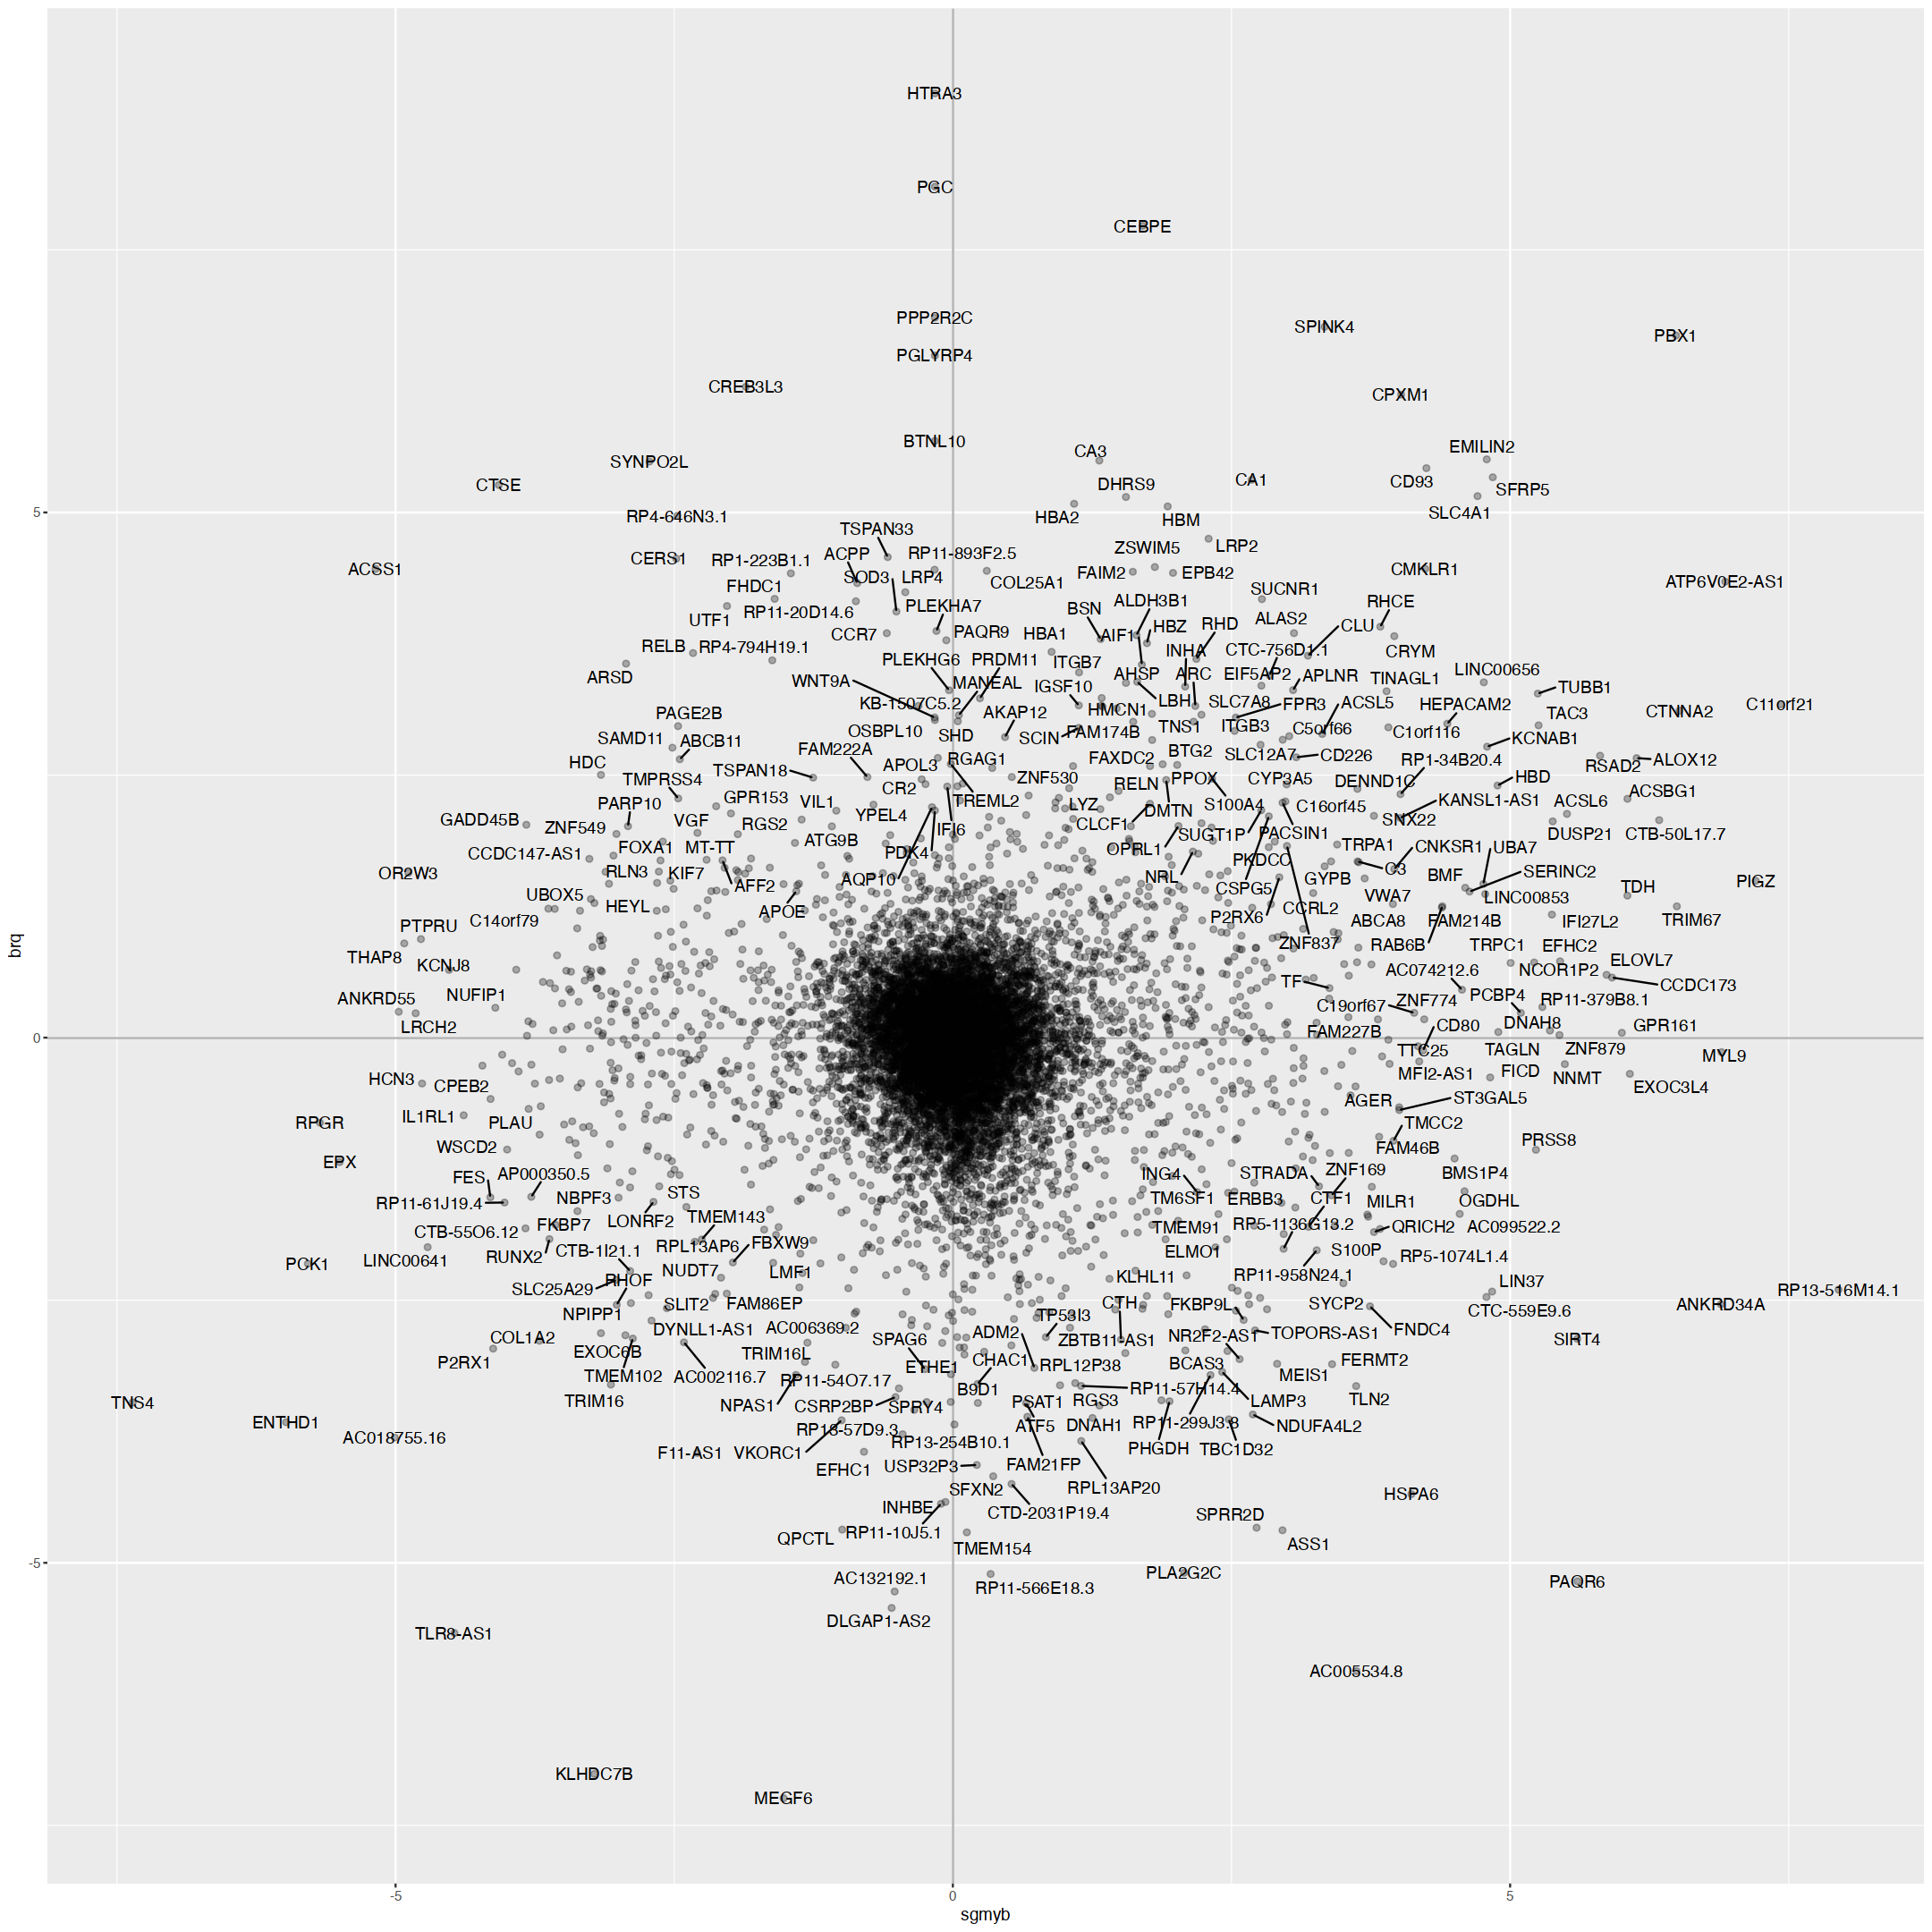

In [47]:
options(repr.plot.height=18, repr.plot.width=18)

genes$label = ""
interesting_genes = union(rownames(subset(sgmyb, adj.P.Val < 1e-7 | abs(logFC) > 2)),
                          rownames(subset(brq, adj.P.Val < 1e-7 | abs(logFC) > 2)))
genes[interesting_genes,]$label = interesting_genes
ggplot(genes, aes(x=sgmyb, y=brq, label=label)) + geom_point(alpha=0.3) + 
geom_text_repel(max.overlaps=10) + geom_hline(yintercept=0, alpha=0.3) + geom_vline(xintercept=0, alpha=0.3)

In [48]:
norm_data["AIF1",]

sgNTC.1_NA_NA_rep1       sgNTC.1_NA_NA_rep2       sgNTC.1_NA_NA_rep3 
               3.4963450                1.6927162                2.6261829 
      sgMYB.1_NA_NA_rep1       sgMYB.1_NA_NA_rep2       sgMYB.1_NA_NA_rep3 
               4.4273993                4.4560817                4.3360261 
      sgBCR.1_NA_NA_rep1       sgBCR.1_NA_NA_rep2       sgBCR.1_NA_NA_rep3 
               1.0310231               -0.1658916               -4.9477164 
    sgNTC.1_DMSO_72_rep1     sgNTC.1_DMSO_72_rep2     sgNTC.1_DMSO_72_rep3 
               2.2772034                2.0475437                1.8632240 
sgNTC.1_BRQ250nM_72_rep1 sgNTC.1_BRQ250nM_72_rep2 sgNTC.1_BRQ250nM_72_rep3 
               5.1859002                6.3432772                5.4530403 
         par_Veh_24_rep1          par_Veh_24_rep2          par_Veh_24_rep3 
               2.8787571                2.2447227                2.7294422 
       par_HU125_12_rep1        par_HU125_12_rep2        par_HU125_12_rep3 
               3.4832515                3.2412839                0.2944499 
         par_HU1_12_rep1          par_HU1_12_rep2          par_HU1_12_rep3 
               2.8573003                3.9034825                3.0609674 
       par_HU125_24_rep1        par_HU125_24_rep2        par_HU125_24_rep3 
               2.9070589                2.2350806                3.3813599

Warning message:
"ggrepel: 1594 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


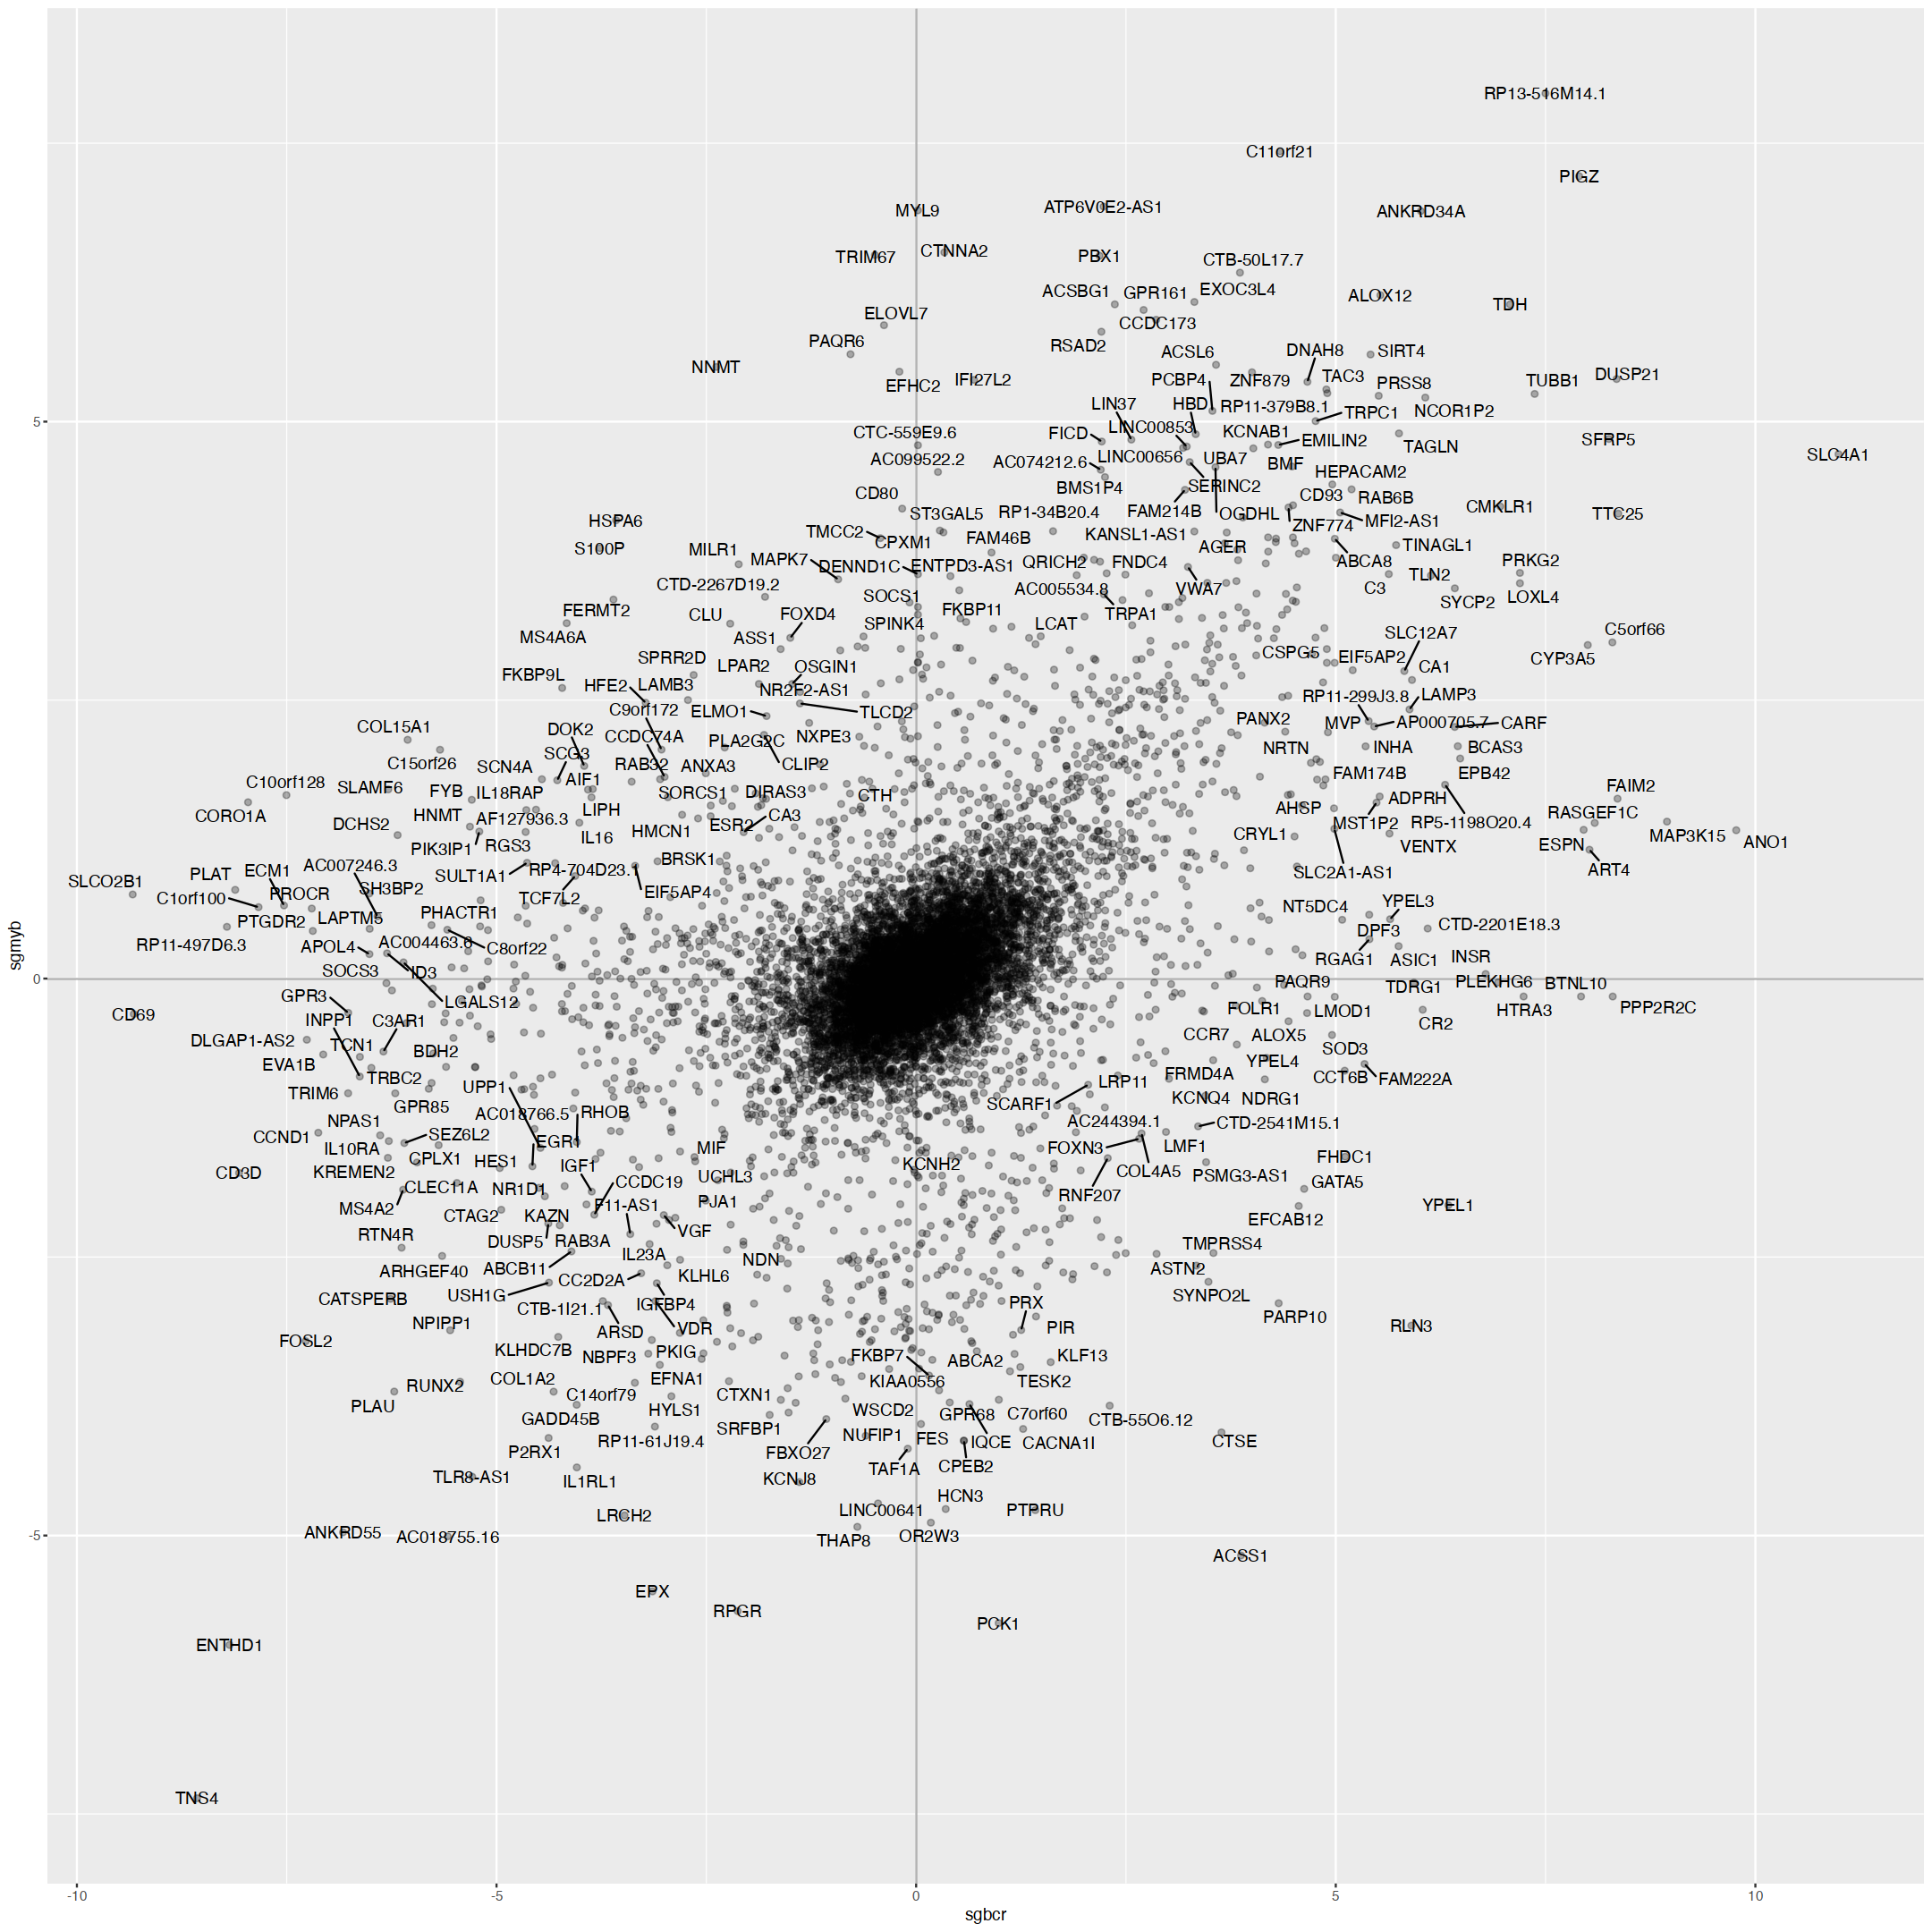

In [49]:
options(repr.plot.height=18, repr.plot.width=18)

genes$label = ""
interesting_genes = union(rownames(subset(sgbcr, adj.P.Val < 1e-7 | abs(logFC) > 2)),
                          rownames(subset(sgmyb, adj.P.Val < 1e-7 | abs(logFC) > 2)))
genes[interesting_genes,]$label = interesting_genes
ggplot(genes, aes(x=sgbcr, y=sgmyb, label=label)) + geom_point(alpha=0.3) + 
geom_text_repel(max.overlaps=10) + geom_hline(yintercept=0, alpha=0.3) + geom_vline(xintercept=0, alpha=0.3)